In [1]:
# Import statements

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression

import xgboost as xgb
from xgboost import XGBRegressor

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Reading the dataset and converting it into a pandas dataframe
file_name= "/Users/ajaychandraas/Library/CloudStorage/OneDrive-IUInternationalUniversityofAppliedSciences/3rd Sem Subjects/Case Study Model Engineering/sickness_table.csv"

read_file = pd.read_csv(file_name)
df= pd.DataFrame(read_file)

# Dropped the Index column from the DataFrame as it is unnecessary for our use in Pandas.
df = df.drop(df.columns[0], axis=1)
df.head(5)

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [3]:
# Fetching the summary statistics 
df.describe()

,n_sick,calls,n_duty,n_sby,sby_need,dafted
count,1152.000000,1152.000000,1152.000000,1152.0,1152.000000,1152.000000
mean,68.808160,7919.531250,1820.572917,90.0,34.718750,16.335938
std,14.293942,1290.063571,80.086953,0.0,79.694251,53.394089
min,36.000000,4074.000000,1700.000000,90.0,0.000000,0.000000
25%,58.000000,6978.000000,1800.000000,90.0,0.000000,0.000000
50%,68.000000,7932.000000,1800.000000,90.0,0.000000,0.000000
75%,78.000000,8827.500000,1900.000000,90.0,12.250000,0.000000
max,119.000000,11850.000000,1900.000000,90.0,555.000000,465.000000


In [4]:
# Fetching a concise overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1152 non-null   object 
 1   n_sick    1152 non-null   int64  
 2   calls     1152 non-null   float64
 3   n_duty    1152 non-null   int64  
 4   n_sby     1152 non-null   int64  
 5   sby_need  1152 non-null   float64
 6   dafted    1152 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 63.1+ KB


In [5]:
# Checking the number of unique values in each column
unique = df.nunique()
unique

date        1152
n_sick        74
calls        616
n_duty         3
n_sby          1
sby_need     185
dafted       119
dtype: int64

In [6]:
# Dropping columns not required for further process
df.drop("n_sby", axis=1, inplace=True)
df.columns

Index(['date', 'n_sick', 'calls', 'n_duty', 'sby_need', 'dafted'], dtype='object')

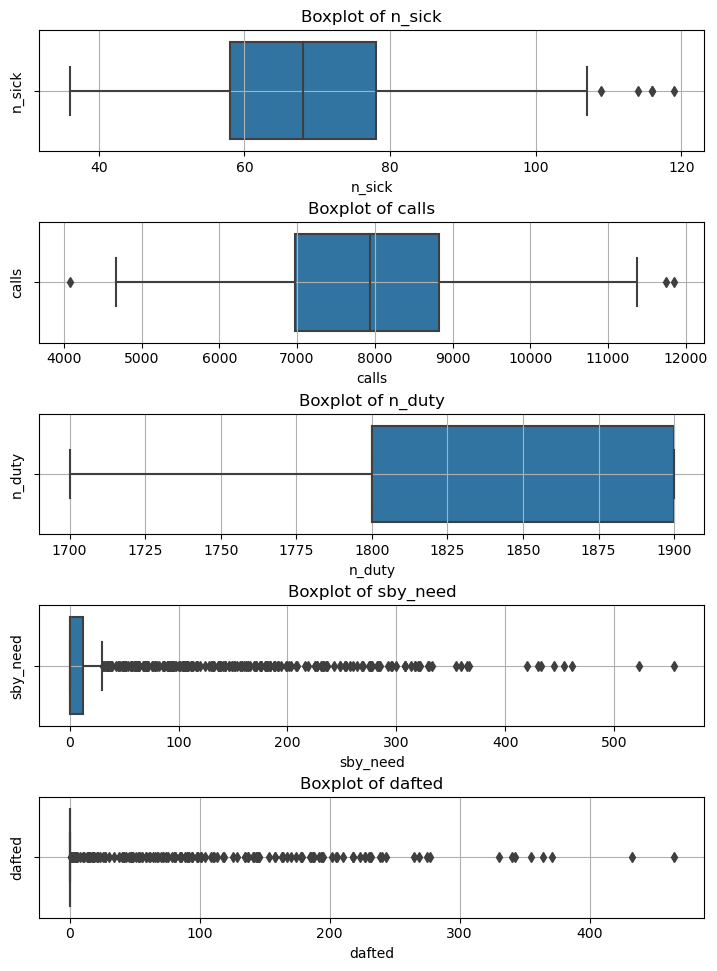

In [7]:
# Selecting only numerical columns for boxplot
numeric_data = df.select_dtypes(include='number')

# Setting up subplots
fig, axes = plt.subplots(nrows=len(numeric_data.columns), figsize=(8, 2 * len(numeric_data.columns)))
fig.tight_layout(pad=3.0)

# Plotting boxplots for each numerical column
for i, column in enumerate(numeric_data.columns):
    sns.boxplot(ax=axes[i], x=numeric_data[column])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

plt.show()

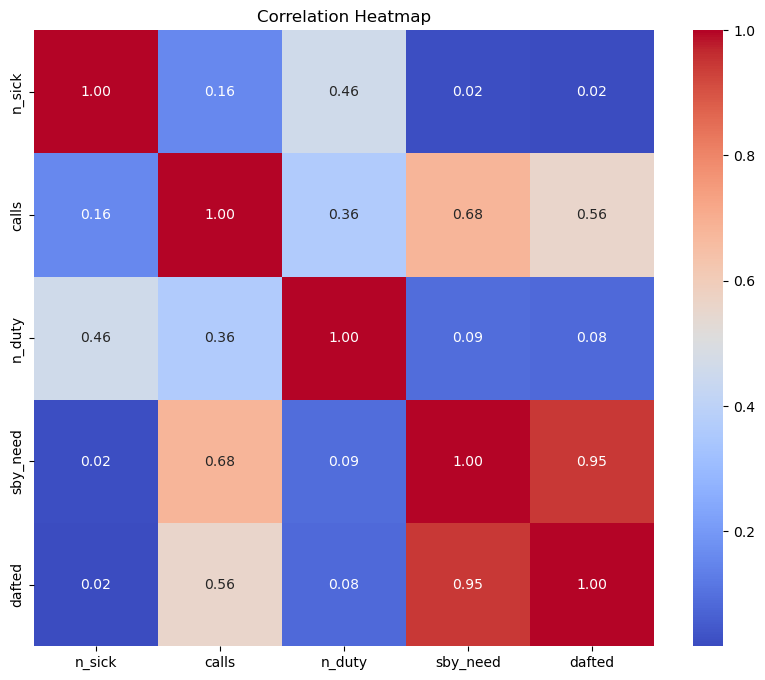

In [8]:
# Plotting the correlation matrix for the selected columns
correlation_matrix = df[['n_sick', 'calls', 'n_duty', 'sby_need', 'dafted']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


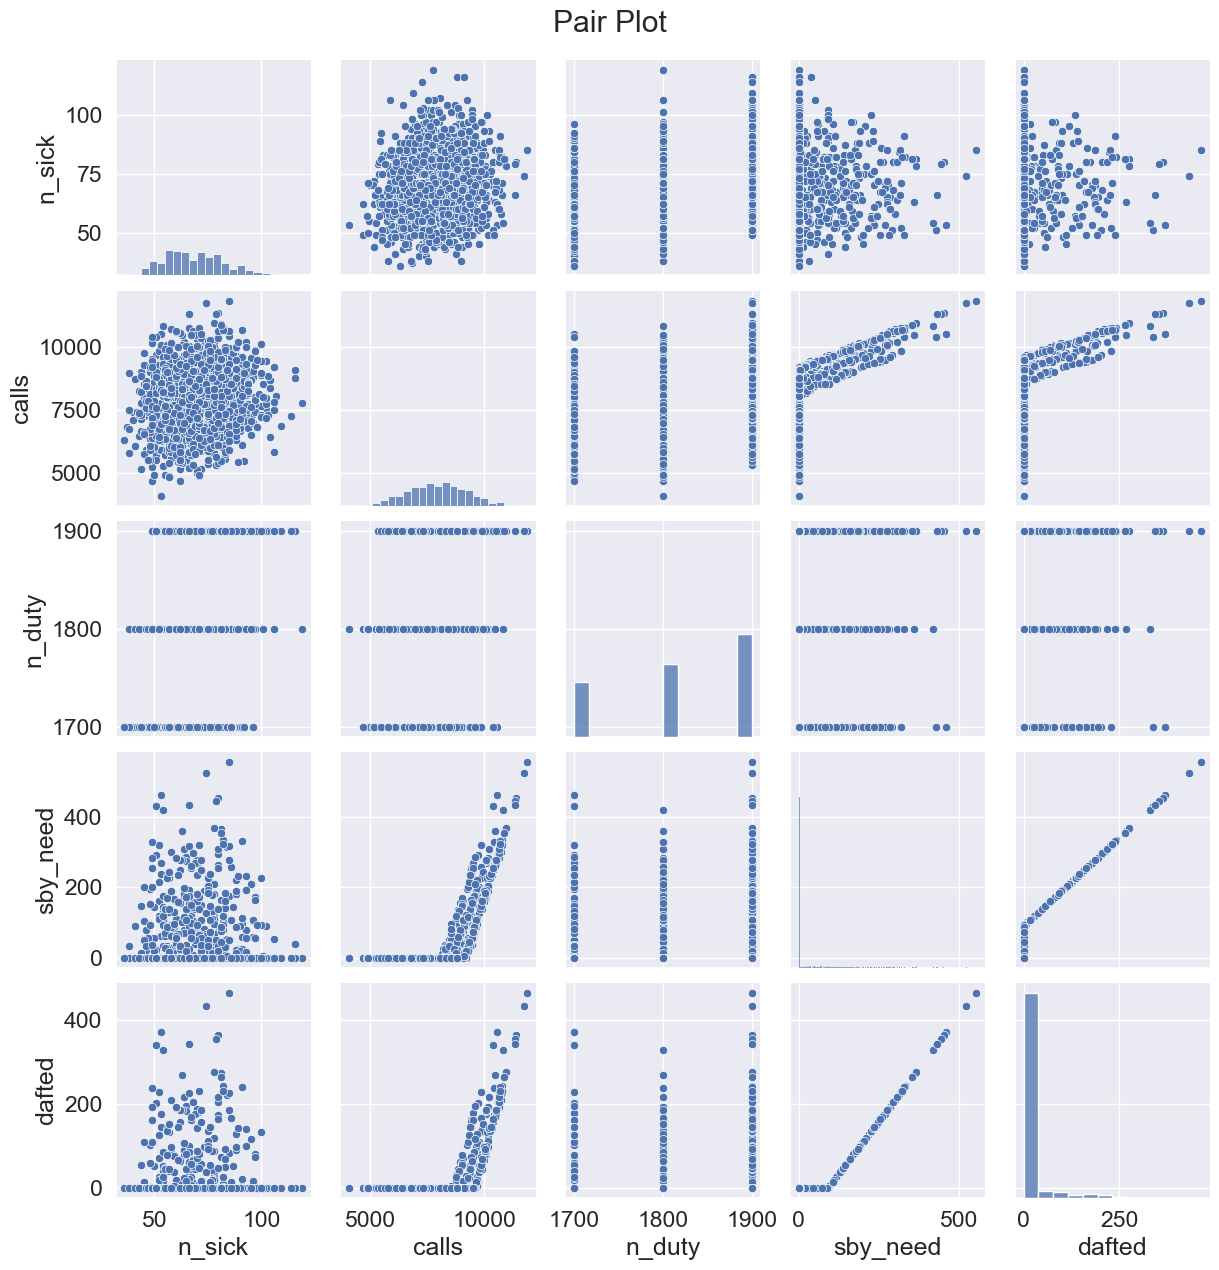

In [9]:
# Plotting a pair plot for the selected columns
sns.set(font_scale=1.5)
pair_plot = sns.pairplot(df[['n_sick', 'calls', 'n_duty', 'sby_need', 'dafted']])
pair_plot.fig.suptitle("Pair Plot", y=1.02)
plt.show()

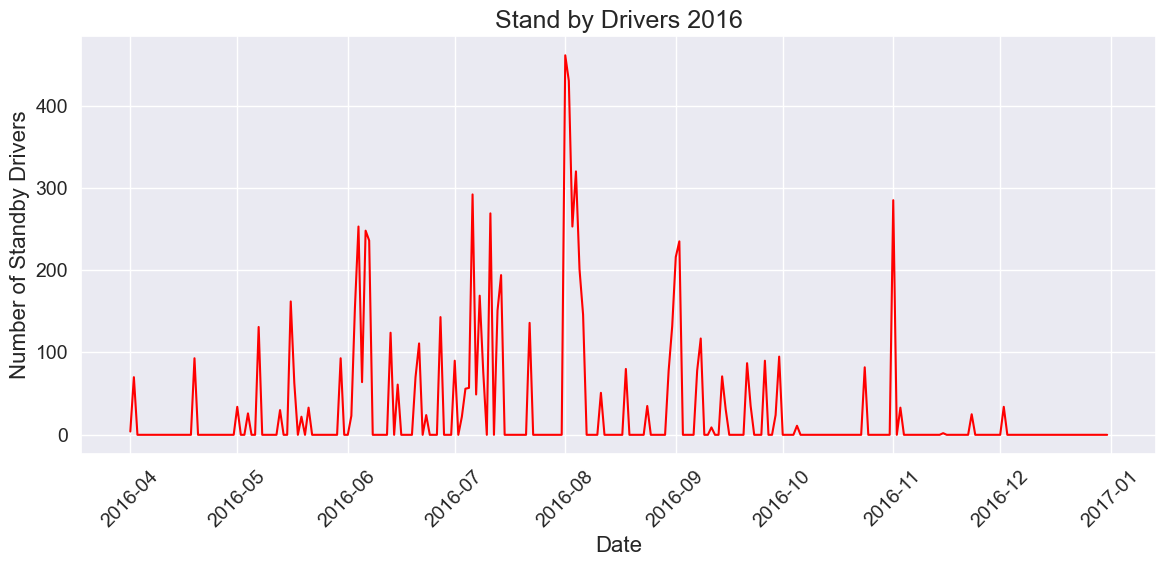

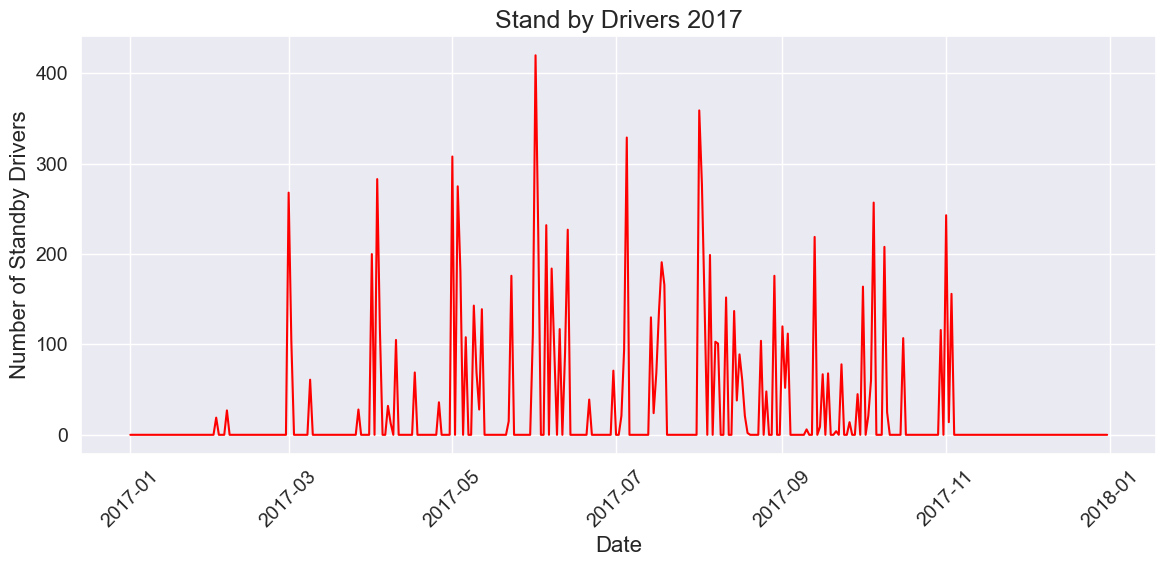

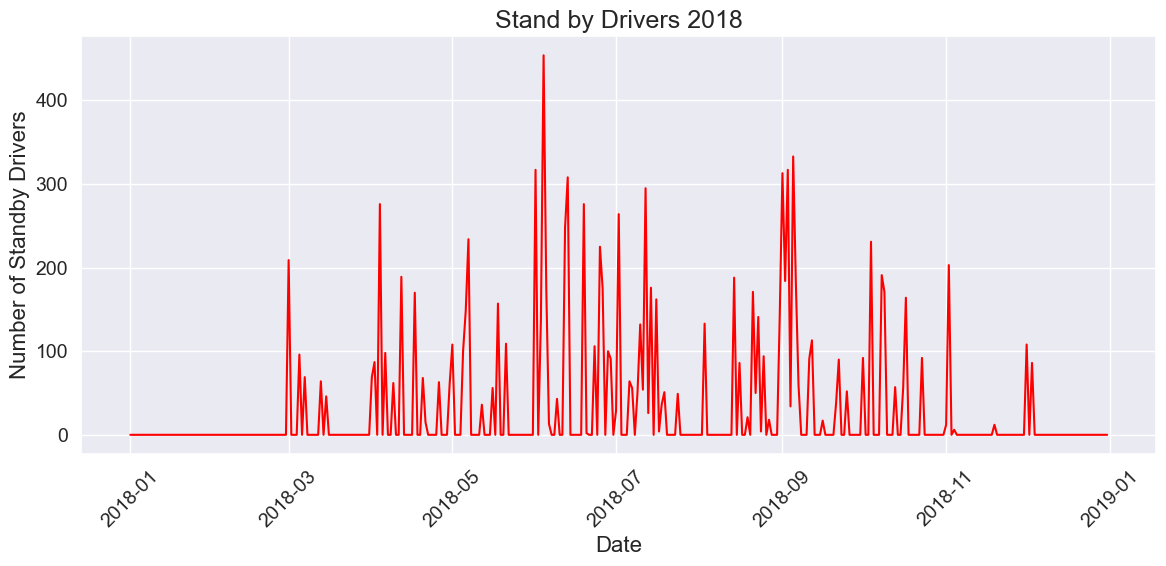

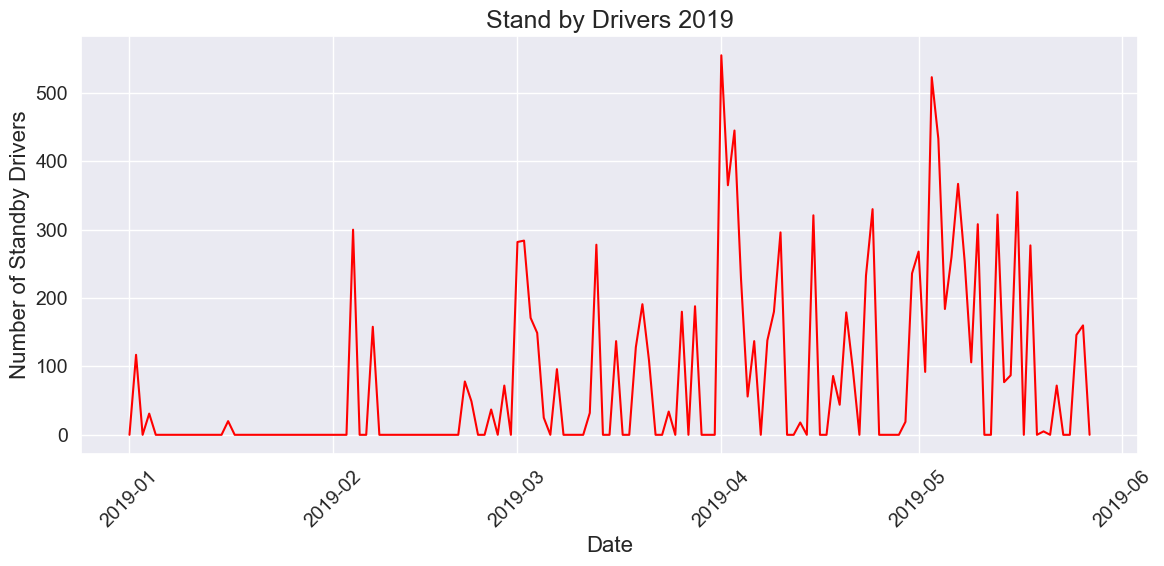

In [10]:
# Plotting "date vs n_sby" plot for each year 
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

selected_year =  [2016,2017,2018,2019]
for i in selected_year:
    data_yearly = df[df['year'] == i]
    plt.figure(figsize=(12, 6))
    plt.plot(data_yearly['date'], data_yearly['sby_need'], linestyle='-', color='red')
    plt.title(f'Stand by Drivers {i}', fontsize=18)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Number of Standby Drivers', fontsize=16)
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

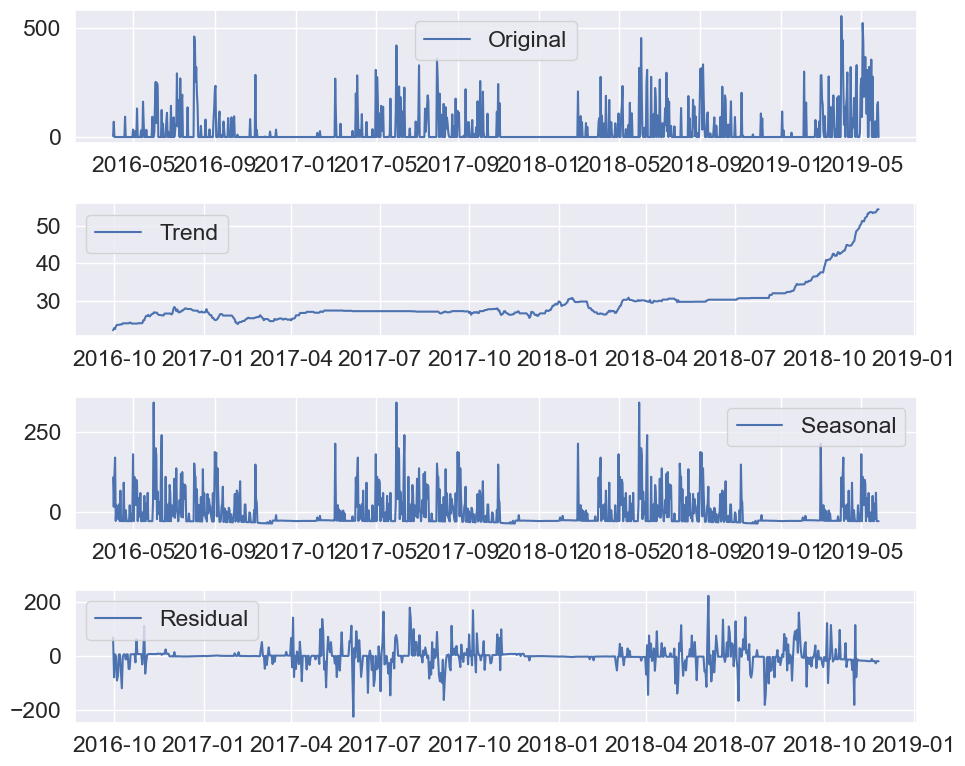

In [11]:
# Plotting Seasonal Decomposition Plots
decomposition = seasonal_decompose(df['sby_need'], period=365)  # Adjust the period as needed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['date'], df['sby_need'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df['date'], trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df['date'], seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df['date'], residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/343769095.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


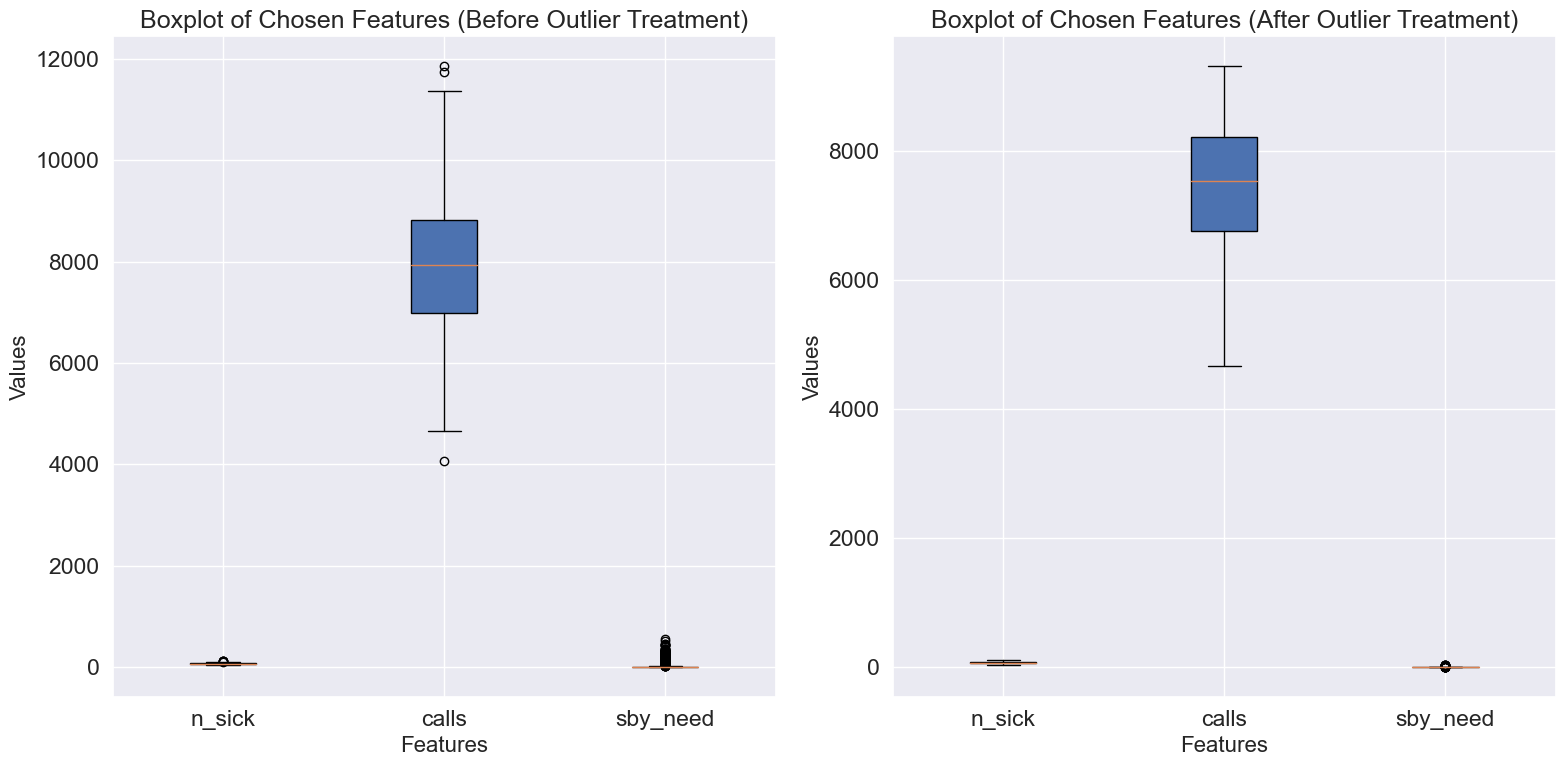

In [12]:
# Clipping outliers
numeric_data = df.select_dtypes(include='number').drop(columns=['year', 'n_duty', 'dafted'])

# Detecting outliers using IQR method
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Defining boundaries for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)

# Removing outliers
data_cleaned = df[~outliers]

# Visualizing boxplots before and after outlier treatment for chosen features
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.boxplot(numeric_data.values, vert=True, patch_artist=True, labels=numeric_data.columns)
plt.title('Boxplot of Chosen Features (Before Outlier Treatment)', fontsize=18)
plt.ylabel('Values', fontsize=16)
plt.xlabel('Features', fontsize=16)
plt.tight_layout()

plt.subplot(1, 2, 2)
numeric_data_cleaned = data_cleaned.select_dtypes(include='number').drop(columns=['year', 'n_duty', 'dafted'])
plt.boxplot(numeric_data_cleaned.values, vert=True, patch_artist=True, labels=numeric_data_cleaned.columns)
plt.title('Boxplot of Chosen Features (After Outlier Treatment)', fontsize=18)
plt.ylabel('Values', fontsize=16)
plt.xlabel('Features', fontsize=16)
plt.tight_layout()

plt.show()


In [13]:
# Scaling selected numerical features
data_min_max_scaled= data_cleaned.copy()
numerical_columns = ['n_sick', 'calls', 'n_duty', 'sby_need', 'dafted']  

# Performing Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled[numerical_columns] = min_max_scaler.fit_transform(data_min_max_scaled[numerical_columns])

print("Min-Max Scaled Data:")
data_min_max_scaled.head()

Min-Max Scaled Data:


,date,n_sick,calls,n_duty,sby_need,dafted,year
0,2016-04-01,0.521127,0.750646,0.0,0.133333,0.0,2016
2,2016-04-03,0.450704,0.736434,0.0,0.000000,0.0,2016
3,2016-04-04,0.492958,0.511628,0.0,0.000000,0.0,2016
4,2016-04-05,0.380282,0.552972,0.0,0.000000,0.0,2016
5,2016-04-06,0.478873,0.392765,0.0,0.000000,0.0,2016


In [14]:
# Performing Standard Scaling
data_standard_scaled= data_cleaned.copy()
standard_scaler = StandardScaler()
data_standard_scaled[numerical_columns] = standard_scaler.fit_transform(data_standard_scaled[numerical_columns])

print("\nStandard Scaled Data:")
data_standard_scaled.head()


Standard Scaled Data:


,date,n_sick,calls,n_duty,sby_need,dafted,year
0,2016-04-01,0.324578,0.707426,-1.466036,0.748064,0.0,2016
2,2016-04-03,-0.030180,0.641216,-1.466036,-0.209243,0.0,2016
3,2016-04-04,0.182675,-0.406112,-1.466036,-0.209243,0.0,2016
4,2016-04-05,-0.384938,-0.213500,-1.466036,-0.209243,0.0,2016
5,2016-04-06,0.111723,-0.959872,-1.466036,-0.209243,0.0,2016


In [15]:
# Selected Min-Max Scaled Data for further processes
new_df= data_min_max_scaled

# Adding day_of_week, month and season categorical features
new_df['date'] = pd.to_datetime(new_df['date'])

new_df['day_of_week']=new_df['date'].dt.strftime('%a')
new_df['month']=new_df['date'].dt.strftime('%b')
month_numeric = new_df['date'].dt.month

def seasons(month):
    if month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    elif month in [9,10,11]:
        return "Autumn"
    else:
        return "Winter"
    
new_df['season'] = month_numeric.apply(seasons) 
new_df.head()

,date,n_sick,calls,n_duty,sby_need,dafted,year,day_of_week,month,season
0,2016-04-01,0.521127,0.750646,0.0,0.133333,0.0,2016,Fri,Apr,Spring
2,2016-04-03,0.450704,0.736434,0.0,0.000000,0.0,2016,Sun,Apr,Spring
3,2016-04-04,0.492958,0.511628,0.0,0.000000,0.0,2016,Mon,Apr,Spring
4,2016-04-05,0.380282,0.552972,0.0,0.000000,0.0,2016,Tue,Apr,Spring
5,2016-04-06,0.478873,0.392765,0.0,0.000000,0.0,2016,Wed,Apr,Spring


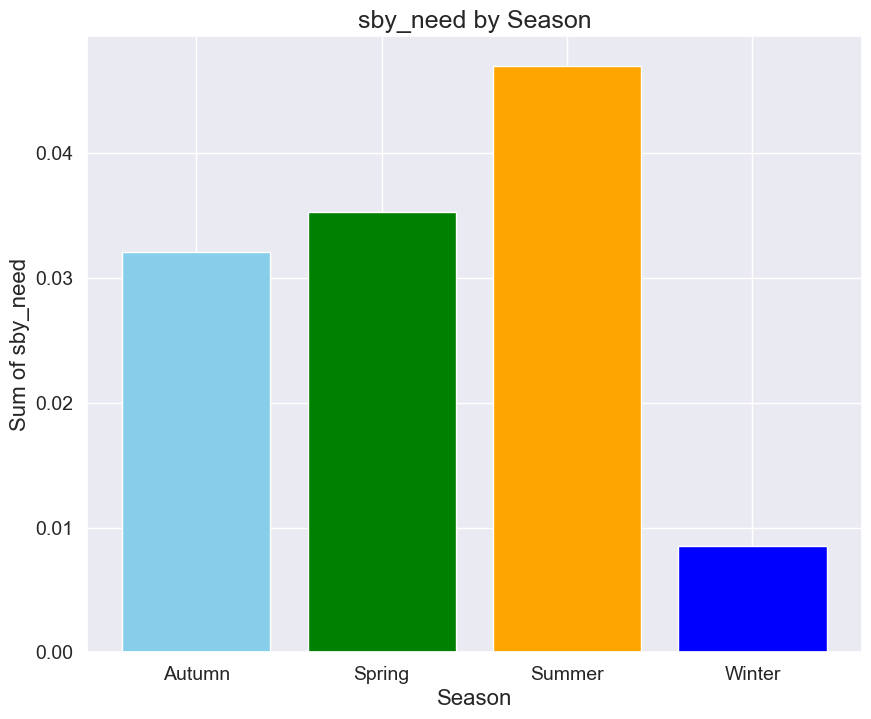

In [16]:
# Creating sby_need vs Season Plot
season_group = new_df.groupby('season')['sby_need'].mean().reset_index()
colors = ['skyblue', 'green', 'orange', 'blue']

# Creating a bar plot
plt.figure(figsize=(10, 8))
plt.bar(season_group['season'], season_group['sby_need'], color=colors)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Sum of sby_need', fontsize=16)
plt.title('sby_need by Season', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

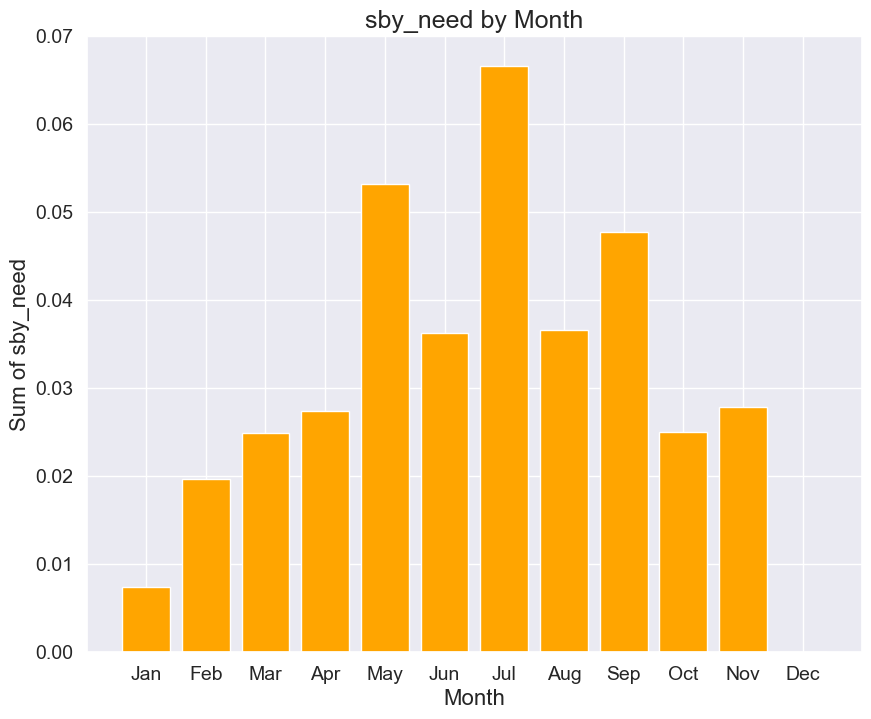

In [17]:
# Creating sby_need vs Month Plot

# Define the custom order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month' to a categorical variable with custom order
new_df['month'] = pd.Categorical(new_df['month'], categories=month_order, ordered=True)

month_group = new_df.groupby('month')['sby_need'].mean().reset_index()

# Creating a bar plot
plt.figure(figsize=(10, 8))
plt.bar(month_group['month'], month_group['sby_need'], color='orange')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Sum of sby_need', fontsize=16)
plt.title('sby_need by Month', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

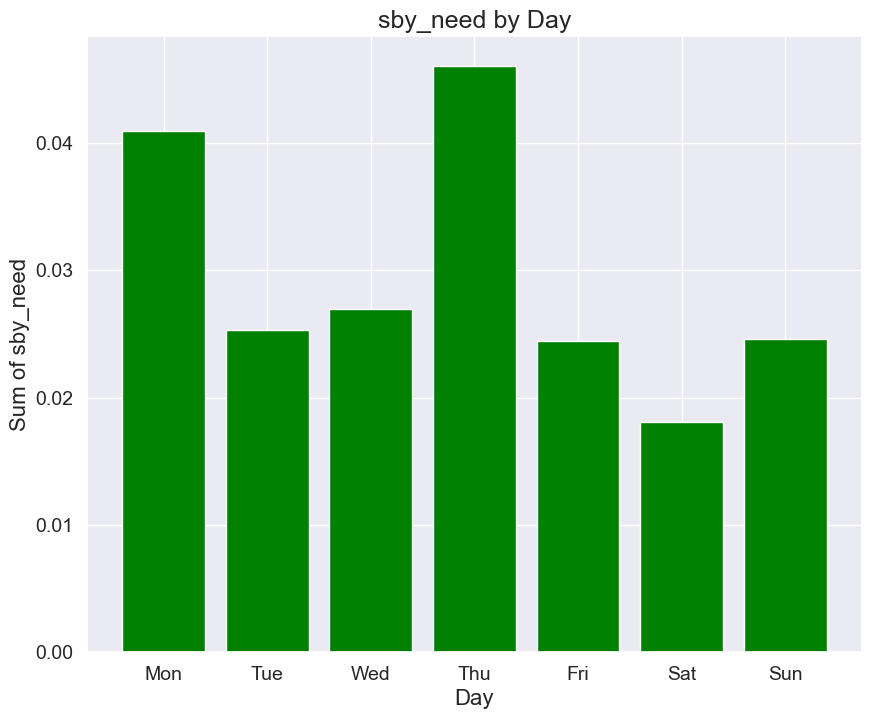

In [18]:
# Creating sby_need vs Day of Week Plot

# Define the custom order of days
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Convert 'day' to a categorical variable with custom order
new_df['day_of_week'] = pd.Categorical(new_df['day_of_week'], categories=day_order, ordered=True)

day_group = new_df.groupby('day_of_week')['sby_need'].mean().reset_index()
# colors = ['skyblue', 'green', 'orange', 'blue']

# # Creating a bar plot
plt.figure(figsize=(10, 8))
plt.bar(day_group['day_of_week'], day_group['sby_need'], color='green')
plt.xlabel('Day', fontsize=16)
plt.ylabel('Sum of sby_need', fontsize=16)
plt.title('sby_need by Day', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


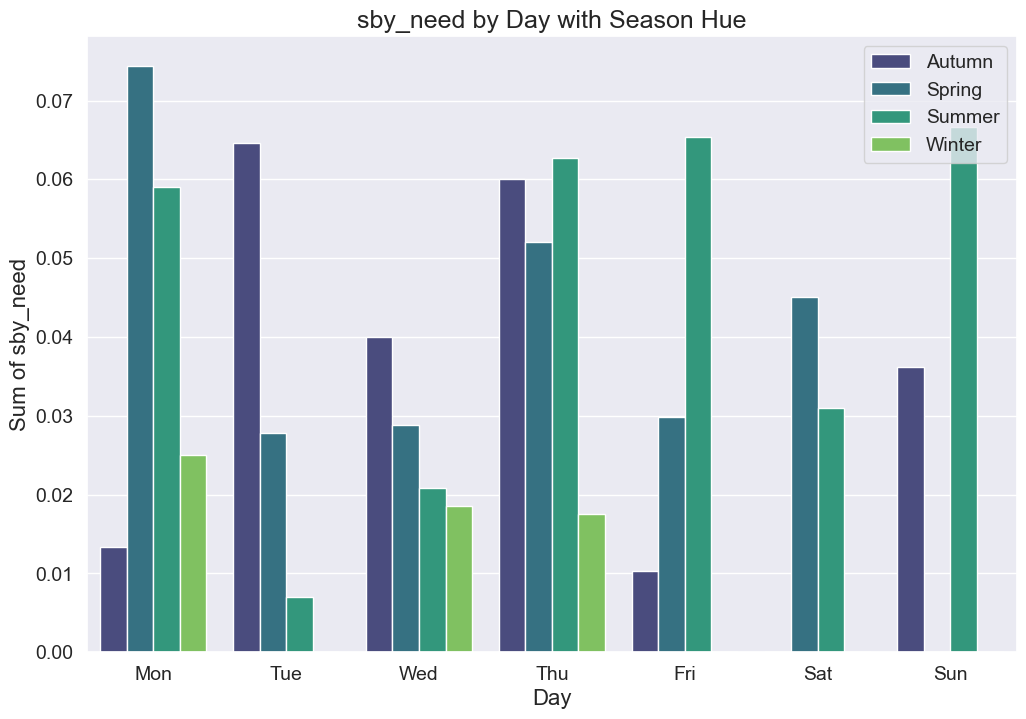

In [19]:
# Creating sby_need vs Day of Week Plot with Season Hue

# Define the custom order of days
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Convert 'day' to a categorical variable with custom order
new_df['day_of_week'] = pd.Categorical(new_df['day_of_week'], categories=day_order, ordered=True)

# Define a mapping of months to seasons
season_mapping = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring',
    'Apr': 'Spring', 'May': 'Spring', 'Jun': 'Summer',
    'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Autumn',
    'Oct': 'Autumn', 'Nov': 'Autumn', 'Dec': 'Winter'
}

# Map 'month' to 'season'
new_df['season'] = new_df['month'].map(season_mapping)

# Group by day and season, calculate the sum of 'sby_need'
day_season_group = new_df.groupby(['day_of_week', 'season'])['sby_need'].mean().reset_index()

# Creating a bar plot with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='day_of_week', y='sby_need', hue='season', data=day_season_group, palette='viridis')
plt.xlabel('Day', fontsize=16)
plt.ylabel('Sum of sby_need', fontsize=16)
plt.title('sby_need by Day with Season Hue', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

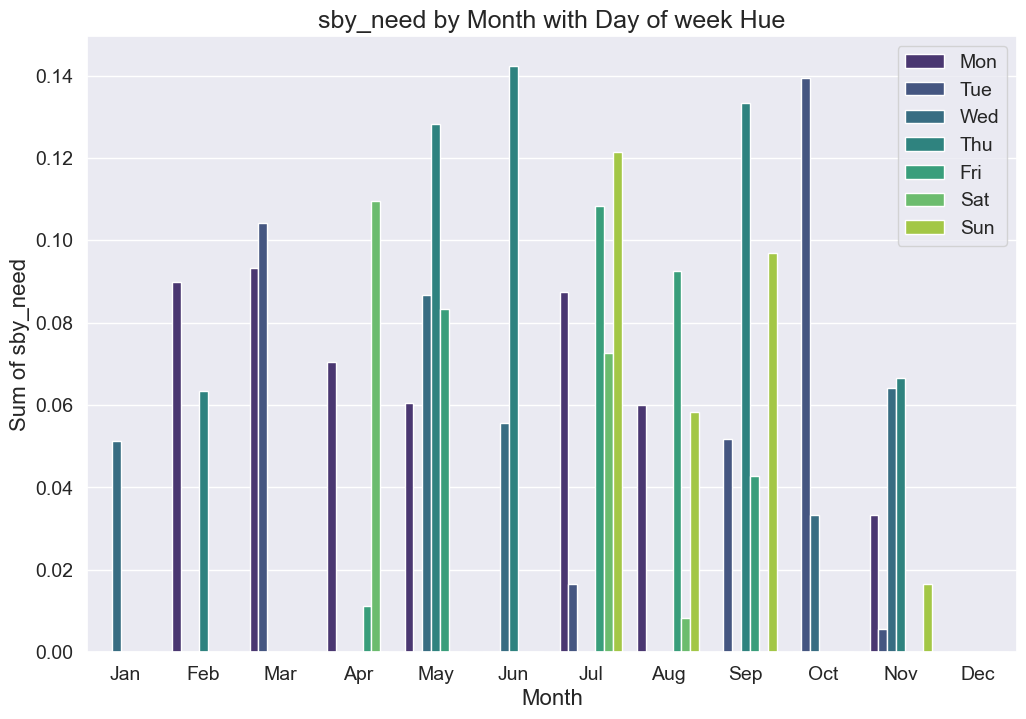

In [20]:
# Creating sby_need vs Month Plot with Day of Week Hue

# Define the custom order of days
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Convert 'day_of_week' to a categorical variable with custom order
new_df['day_of_week'] = pd.Categorical(new_df['day_of_week'], categories=day_order, ordered=True)

# Define a mapping of months to seasons
season_mapping = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring',
    'Apr': 'Spring', 'May': 'Spring', 'Jun': 'Summer',
    'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Autumn',
    'Oct': 'Autumn', 'Nov': 'Autumn', 'Dec': 'Winter'
}

# Map 'month' to 'season'
new_df['season'] = new_df['month'].map(season_mapping)

# Group by month and day, calculate the sum of 'sby_need'
month_day_group = new_df.groupby(['month', 'day_of_week'])['sby_need'].mean().reset_index()

# Creating a bar plot with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='sby_need', hue='day_of_week', data=month_day_group, palette='viridis')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Sum of sby_need', fontsize=16)
plt.title('sby_need by Month with Day of week Hue', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [21]:
# Performing One-hot Encoding for Categorical columns
cat_columns= ['day_of_week', 'month', 'season']
df_transformed = pd.get_dummies(new_df, columns = cat_columns, dtype=int)
df_transformed.head()

,date,n_sick,calls,n_duty,sby_need,dafted,year,day_of_week_Mon,day_of_week_Tue,day_of_week_Wed,...,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec,season_Autumn,season_Spring,season_Summer,season_Winter
0,2016-04-01,0.521127,0.750646,0.0,0.133333,0.0,2016,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2016-04-03,0.450704,0.736434,0.0,0.000000,0.0,2016,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2016-04-04,0.492958,0.511628,0.0,0.000000,0.0,2016,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2016-04-05,0.380282,0.552972,0.0,0.000000,0.0,2016,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,2016-04-06,0.478873,0.392765,0.0,0.000000,0.0,2016,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# Displaing all the columns in the dataset
df_transformed.columns

Index(['date', 'n_sick', 'calls', 'n_duty', 'sby_need', 'dafted', 'year',
       'day_of_week_Mon', 'day_of_week_Tue', 'day_of_week_Wed',
       'day_of_week_Thu', 'day_of_week_Fri', 'day_of_week_Sat',
       'day_of_week_Sun', 'month_Jan', 'month_Feb', 'month_Mar', 'month_Apr',
       'month_May', 'month_Jun', 'month_Jul', 'month_Aug', 'month_Sep',
       'month_Oct', 'month_Nov', 'month_Dec', 'season_Autumn', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')

In [23]:
# Creating a Dataset copy
final_data= df_transformed.copy()

In [ ]:
### Aggregation of Data for Monthly Prediction of Time Series Models

In [24]:
# Monthly Aggregated Data
mo_df= final_data.copy()

# 'M' indicates monthly aggregation (summing up values)
mo_df.set_index('date', inplace=True)
monthly_aggregated_data = mo_df.resample('M').sum()  
monthly_aggregated_data.reset_index(inplace=True)
monthly_aggregated_data.head()

,date,n_sick,calls,n_duty,sby_need,dafted,year,day_of_week_Mon,day_of_week_Tue,day_of_week_Wed,...,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec,season_Autumn,season_Spring,season_Summer,season_Winter
0,2016-04-30,10.014085,11.923773,0.0,0.133333,0.0,56448,4,3,4,...,0,0,0,0,0,0,0,28,0,0
1,2016-05-31,7.140845,14.975452,0.0,2.600000,0.0,50400,3,4,4,...,0,0,0,0,0,0,0,25,0,0
2,2016-06-30,4.901408,11.493540,0.0,1.566667,0.0,40320,0,2,4,...,0,0,0,0,0,0,0,0,20,0
3,2016-07-31,5.943662,9.838501,0.0,0.733333,0.0,40320,2,3,2,...,20,0,0,0,0,0,0,0,20,0
4,2016-08-31,2.521127,10.802326,0.0,0.000000,0.0,40320,4,3,2,...,0,20,0,0,0,0,0,0,20,0


In [ ]:
### Preparation steps to implement Time Series Model for monthly aggregated data

In [ ]:
 ### Function to check stationarity

In [25]:
# Testing the stationarity of the data to implement Time Series Models

def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
    
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')

In [ ]:
### Checking Stationarity of monthly aggregated data

Test Statistic                 -5.576156
p-value                         0.000001
#lags used                      0.000000
number of observations used    37.000000
dtype: float64
criticality 1% : -3.6209175221605827
criticality 5% : -2.9435394610388332
criticality 10% : -2.6104002410518627


'The values calculate after 10 units is because the first 12 windows is used for learning'

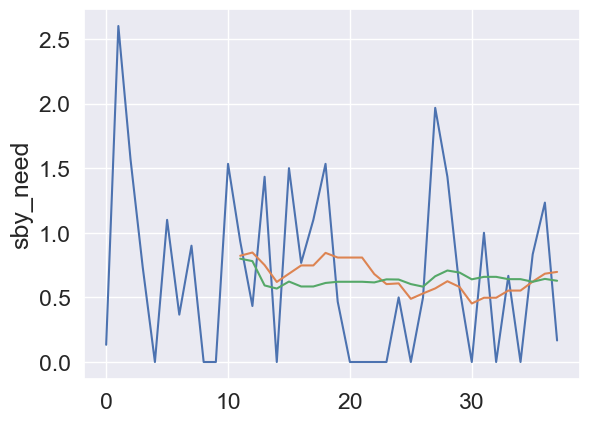

In [26]:
# check stationary of aggregated data using ADF Test
unshifted_df_mo= monthly_aggregated_data[['sby_need']].copy()

test_stationarity(unshifted_df_mo.dropna(), 'sby_need')


# Test Statistic is not less than critical value so the data is not stationary
"""The values calculate after 10 units is because the first 12 windows is used for learning"""

In [27]:
# Creating a copy of the dataset
mad_df= monthly_aggregated_data.copy()
mad_cpy= mad_df[['sby_need']].copy()

In [ ]:
### PACF Plot

<Figure size 1000x500 with 0 Axes>

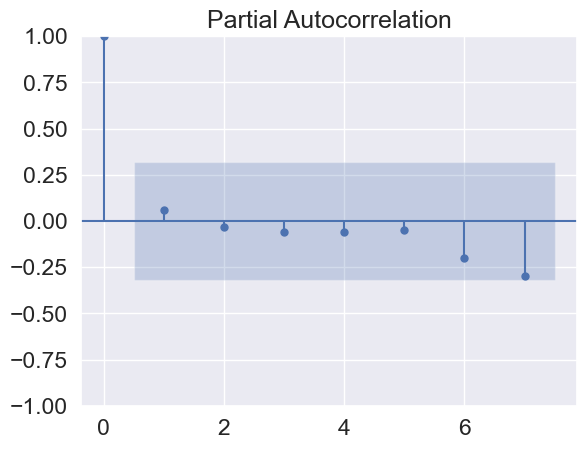

In [28]:
"""Lag value for PACF test (system message: Can only compute partial correlations 
for lags up to 50% of the sample size. 
 Because of this, I chose lag as 7"""
plt.figure(figsize=(10, 5))
plot_pacf(mad_cpy['sby_need'].dropna(), lags=7)
plt.show()

In [ ]:
### ACF Plot

<Figure size 1000x500 with 0 Axes>

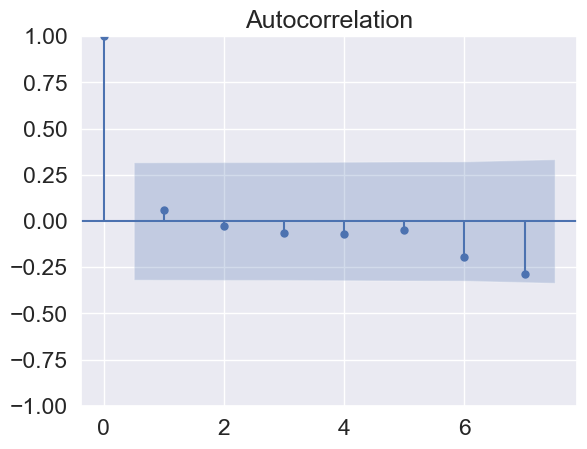

In [29]:
plt.figure(figsize=(10, 5))
# plot_acf(mad_cpy['sby_need'].dropna(), lags= 7)
plot_acf(mad_cpy['sby_need'].dropna(), lags=7)
plt.show()

In [ ]:
### Monthly Prediction using Time Series Models

In [ ]:
### Train-Test Split of Date and Target variable for Monthly Prediction of Time Series data

In [30]:
# Train-Test Split for Monthly Aggregated Data for Time Series Model
train_mo= mad_cpy[:round(len(mad_cpy)*70/100)]
test_mo= mad_cpy[round(len(mad_cpy)*70/100):]

In [ ]:
# ARIMA Model Monthly Prediction

MSE Train: 0.45838463832483556
MAE Train: 0.5685179383829025
MAPE Train: 3.140983084988412
MSE Test: 0.39239932218574014
MAE Test: 0.5227267980708596
MAPE Test: 6.64483217886686


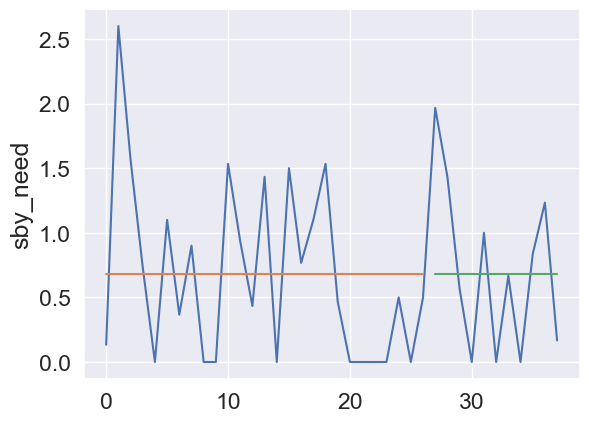

In [31]:
# ARIMA Model (monthly)
ar_mo_model = ARIMA(mad_cpy['sby_need'], order=(0, 0, 0))
ar_mo_model_fit = ar_mo_model.fit()

# Forecasting the training set
train_forecast_ar_mo = ar_mo_model_fit.get_prediction(start= train_mo.index[0], end= train_mo.index[-1])
predicted_train_values_ar_mo = train_forecast_ar_mo.predicted_mean
mad_cpy['arimaPred_train'] = predicted_train_values_ar_mo

# Forecasting the test set
test_forecast_ar_mo = ar_mo_model_fit.get_prediction(start= test_mo.index[0], end= test_mo.index[-1])
predicted_test_values_ar_mo = test_forecast_ar_mo.predicted_mean
mad_cpy['arimaPred_test'] = predicted_test_values_ar_mo

# ARIMA Model Plot with actual and predicted values
sns.lineplot(data=mad_cpy,x=mad_cpy.index,y='sby_need')
sns.lineplot(data=mad_cpy,x=mad_cpy.index,y='arimaPred_train')
sns.lineplot(data=mad_cpy,x=mad_cpy.index,y='arimaPred_test')

# MSE Train Arima
mse_tr_ar_mo= mean_squared_error(train_mo['sby_need'], predicted_train_values_ar_mo)
# MAE Train Arima
mae_tr_ar_mo= mean_absolute_error(train_mo['sby_need'], predicted_train_values_ar_mo)
# MAPE Train Arima
mape_tr_ar_mo= mean_absolute_error(train_mo['sby_need'], predicted_train_values_ar_mo) / abs(train_mo['sby_need'].mean()) * 100 / train_mo.shape[0]

# MSE Test Arima
mse_tst_ar_mo= mean_squared_error(test_mo['sby_need'], predicted_test_values_ar_mo)
# MAE Test Arima
mae_tst_ar_mo= mean_absolute_error(test_mo['sby_need'], predicted_test_values_ar_mo)
# MAPE Test Arima
mape_tst_ar_mo= mean_absolute_error(test_mo['sby_need'], predicted_test_values_ar_mo) / abs(test_mo['sby_need'].mean()) * 100 / test_mo.shape[0]

print("MSE Train: {}".format(mse_tr_ar_mo))
print("MAE Train: {}".format(mae_tr_ar_mo))
print("MAPE Train: {}".format(mape_tr_ar_mo))
print("MSE Test: {}".format(mse_tst_ar_mo))
print("MAE Test: {}".format(mae_tst_ar_mo))
print("MAPE Test: {}".format(mape_tst_ar_mo))

In [ ]:
# SARIMA Model Monthly Prediction

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36971D+00    |proj g|=  1.10346D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

MSE Train: 0.9526873404870456
MAE Train: 0.6703703703703703
MAPE Train: 3.7037037037037037
MSE Test: 0.9501727647266485
MAE Test: 0.7151515151515151
MAPE Test: 9.090909090909092
   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      9      1     0     0   1.103D-05   1.370D+00
  F =   1.3697063974381016     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


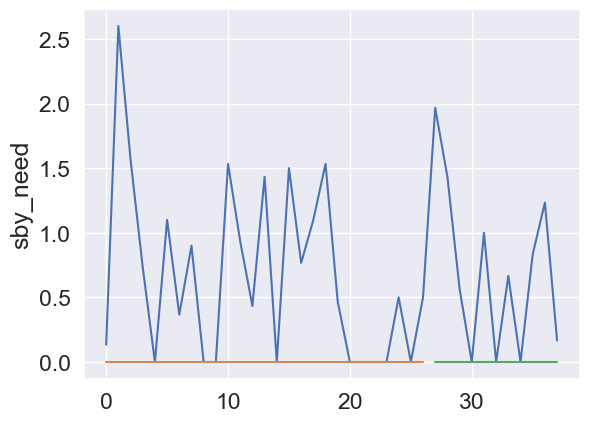

In [32]:
# SARIMAX Model (monthly)
sr_mo_model = SARIMAX(mad_cpy['sby_need'], order=(0, 0, 0), seasonal_order=(0, 0, 0, 12))
sr_mo_model_fit = sr_mo_model.fit()

# Forecasting the training set
train_forecast_sr_mo = sr_mo_model_fit.get_prediction(start= train_mo.index[0], end= train_mo.index[-1])
predicted_train_values_sr_mo = train_forecast_sr_mo.predicted_mean
mad_cpy['sarimaxPred_train'] = predicted_train_values_sr_mo

# Forecasting the test set
test_forecast_sr_mo = sr_mo_model_fit.get_prediction(start= test_mo.index[0], end= test_mo.index[-1])
predicted_test_values_sr_mo = test_forecast_sr_mo.predicted_mean
mad_cpy['sarimaxPred_test'] = predicted_test_values_sr_mo

# SARIMAX Model Plot with actual and predicted values
sns.lineplot(data= mad_cpy, x= mad_cpy.index, y='sby_need')
sns.lineplot(data= mad_cpy, x= mad_cpy.index, y='sarimaxPred_train')
sns.lineplot(data= mad_cpy, x= mad_cpy.index, y='sarimaxPred_test')

# MSE Train SARIMAX
mse_tr_sr_mo= np.sqrt(mean_squared_error(train_mo['sby_need'], predicted_train_values_sr_mo))
# MAE Train SARIMAX
mae_tr_sr_mo= mean_absolute_error(train_mo['sby_need'], predicted_train_values_sr_mo)
# MAPE Train SARIMAX
mape_tr_sr_mo= mean_absolute_error(train_mo['sby_need'], predicted_train_values_sr_mo) / abs(train_mo['sby_need'].mean()) * 100 / train_mo.shape[0]
# MSE Test SARIMAX
mse_tst_sr_mo= np.sqrt(mean_squared_error(test_mo['sby_need'], predicted_test_values_sr_mo))
# MAE Test SARIMAX
mae_tst_sr_mo= mean_absolute_error(test_mo['sby_need'], predicted_test_values_sr_mo)
# MAPE Test SARIMAX
mape_tst_sr_mo= mean_absolute_error(test_mo['sby_need'], predicted_test_values_sr_mo) / abs(test_mo['sby_need'].mean()) * 100 / test_mo.shape[0]

print("MSE Train: {}".format(mse_tr_sr_mo))
print("MAE Train: {}".format(mae_tr_sr_mo))
print("MAPE Train: {}".format(mape_tr_sr_mo))
print("MSE Test: {}".format(mse_tst_sr_mo))
print("MAE Test: {}".format(mae_tst_sr_mo))
print("MAPE Test: {}".format(mape_tst_sr_mo))

In [ ]:
### Preparation steps to implement Time Series Model for daily prediction

In [33]:
# Creating a copy of the dataset
mad_df_dly= final_data.copy()

In [ ]:
### Checking stationarity

Test Statistic                -1.216725e+01
p-value                        1.447813e-22
#lags used                     4.000000e+00
number of observations used    8.860000e+02
dtype: float64
criticality 1% : -3.4377521975315783
criticality 5% : -2.864807640843869
criticality 10% : -2.568509921477307


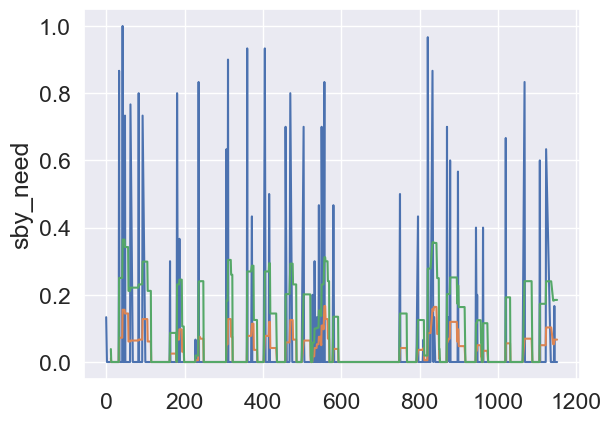

In [34]:
# Checking stationarity using aggregated data
unshifted_df_daily= final_data[['sby_need']].copy()
test_stationarity(unshifted_df_daily.dropna(), 'sby_need')

In [35]:
# Creating a copy of the dataset
mad_dly_cpy= mad_df_dly[['sby_need']].copy()

In [ ]:
### PACF Plot

<Figure size 1000x500 with 0 Axes>

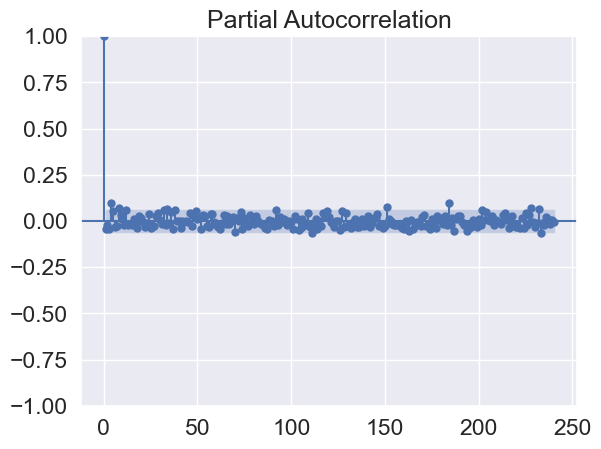

In [36]:
# Lag is 240 because of 7 months seasonality
plt.figure(figsize=(10, 5))
plot_pacf(mad_dly_cpy['sby_need'].dropna(), lags=240)
plt.show()

In [ ]:
### ACF Plot

<Figure size 1000x500 with 0 Axes>

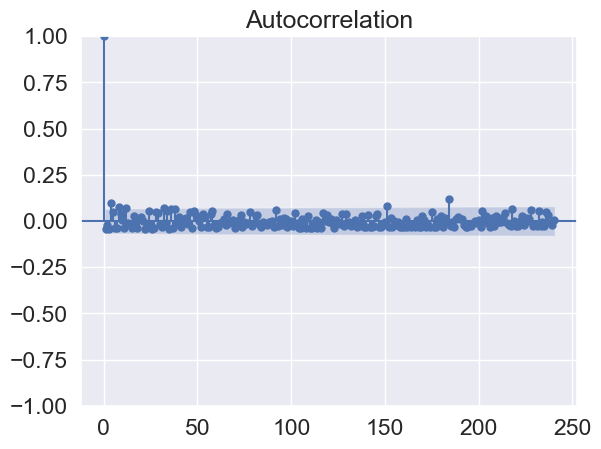

In [37]:
plt.figure(figsize=(10, 5))
plot_acf(mad_dly_cpy['sby_need'].dropna(), lags= 240)
plt.show()

In [ ]:
### 70-30 Split for Daily Prediction of Time Series Models

In [38]:
# We split date and target variable data for implementing the Time Series Model
train_dly= mad_dly_cpy[:round(len(mad_dly_cpy)*70/100)]
test_dly= mad_dly_cpy[round(len(mad_dly_cpy)*70/100):]
train_dly.shape[0]

624

In [ ]:
# ARIMA Model for Daily Prediction

/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.p

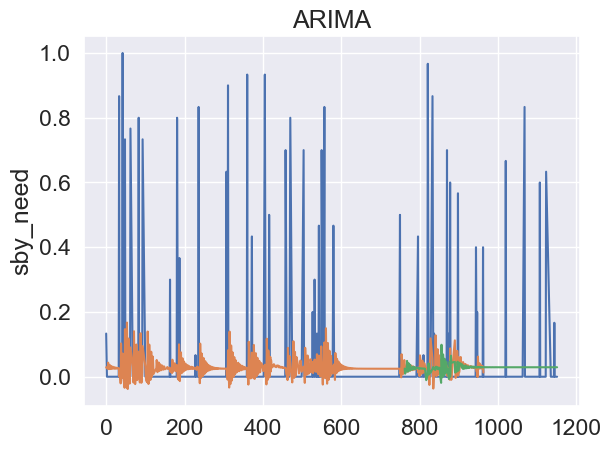

MSE Train: 0.0005713863639718824
MAE Train: 0.05478684753205541
MAPE Train: 79.2901313409161
MSE Test: 0.0023931240104723313
MAE Test: 0.056987205167429195
MAPE Test: 33.335471518592065


In [39]:
# Fit the ARIMA model on the entire dataset
arima_model = ARIMA(mad_dly_cpy['sby_need'], order=(4, 0, 4))
arima_model_fit = arima_model.fit()

# Forecasting the training set
train_forecast_ar = arima_model_fit.get_prediction(start= train_dly.index[0], end= train_dly.index[-1])
predicted_train_values_ar = train_forecast_ar.predicted_mean
mad_dly_cpy['arimaPred_train'] = predicted_train_values_ar

# Forecasting the test set
test_forecast_ar = arima_model_fit.get_prediction(start= test_dly.index[0], end= test_dly.index[-1])
predicted_test_values_ar = test_forecast_ar.predicted_mean
mad_dly_cpy['arimaPred_test'] = predicted_test_values_ar

# Plotting results of ARIMA Model with actual and predicted values
sns.lineplot(data=mad_dly_cpy,x=mad_dly_cpy.index,y='sby_need')
sns.lineplot(data=mad_dly_cpy,x=mad_dly_cpy.index,y='arimaPred_train')
sns.lineplot(data=mad_dly_cpy,x=mad_dly_cpy.index,y='arimaPred_test')
plt.title('ARIMA')
plt.show()

# ARIMA Model Evaluation
# MSE Train Arima
mse_tr_ar= ((train_dly['sby_need'] - predicted_train_values_ar.dropna()).sum())**2 / train_dly.shape[0]
# MAE Train Arima
mae_tr_ar= abs(train_dly['sby_need'] - predicted_train_values_ar.dropna()).sum() / train_dly.shape[0]
# MAPE Train Arima
mape_df_ar_tr = mad_dly_cpy[['sby_need', 'arimaPred_train']]
mape_df_ar_tr = mape_df_ar_tr[mape_df_ar_tr['sby_need'] != 0]
mape_tr_ar= (1/mape_df_ar_tr.shape[0]) * abs((mape_df_ar_tr['sby_need'] - mape_df_ar_tr['arimaPred_train'].dropna())/mape_df_ar_tr['sby_need']).sum() * 100 
# MSE Test Arima
mse_tst_ar= ((test_dly['sby_need'] - predicted_test_values_ar.dropna()).sum())**2 / test_dly.shape[0]
# MAE Test Arima
mae_tst_ar= abs(test_dly['sby_need'] - predicted_test_values_ar.dropna()).sum() / test_dly.shape[0]
# MAPE Test Arima
mape_df_ar_tst = mad_dly_cpy[['sby_need', 'arimaPred_test']]
mape_df_ar_tst = mape_df_ar_tst[mape_df_ar_tst['sby_need'] != 0]
mape_tst_ar= (1/mape_df_ar_tst.shape[0]) * abs((mape_df_ar_tst['sby_need'] - mape_df_ar_tst['arimaPred_test'].dropna())/mape_df_ar_tst['sby_need']).sum() * 100 

print("MSE Train: {}".format(mse_tr_ar))
print("MAE Train: {}".format(mae_tr_ar))
print("MAPE Train: {}".format(mape_tr_ar))
print("MSE Test: {}".format(mse_tst_ar))
print("MAE Test: {}".format(mae_tst_ar))
print("MAPE Test: {}".format(mape_tst_ar))

In [ ]:
# SARIMAX Model for Daily Prediction

/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06066D+02    |proj g|=  1.51773D+03


 This problem is unconstrained.



At iterate    5    f= -3.51855D-01    |proj g|=  6.32373D-01

At iterate   10    f= -4.61682D-01    |proj g|=  1.89059D-01

At iterate   15    f= -5.30358D-01    |proj g|=  1.18234D-01

At iterate   20    f= -5.38054D-01    |proj g|=  1.15921D-01

At iterate   25    f= -5.40041D-01    |proj g|=  4.09540D-02

At iterate   30    f= -5.42721D-01    |proj g|=  1.67271D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     34     60      1     0     0   1.159D-01  -5.432D-01
  F = -0.54319835207806055     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


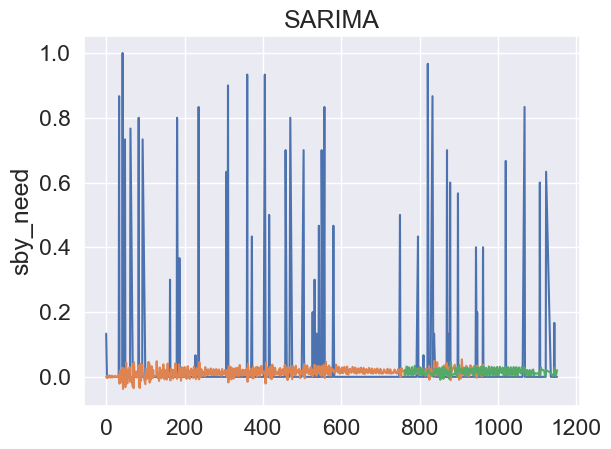

MSE Train: 0.13057555682441407
MAE Train: 0.04272571135843855
MAPE Train: 84.13684173547419
MSE Test: 0.05921234646992209
MAE Test: 0.027283699095807957
MAPE Test: 33.99993368969953


In [40]:
# Fit the SARIMAX model on the entire dataset
# weekly seasonal pattern
sarimax_model = SARIMAX(mad_dly_cpy['sby_need'], order=(4, 0, 4), seasonal_order=(4, 0, 4, 7))
sarimax_model_fit = sarimax_model.fit()

# Forecasting the training set
train_forecast_sr = sarimax_model_fit.get_prediction(start= train_dly.index[0], end= train_dly.index[-1])
predicted_train_values_sr = train_forecast_sr.predicted_mean
mad_dly_cpy['sarimaxPred_train'] = predicted_train_values_sr

# Forecasting the test set
test_forecast_sr = sarimax_model_fit.get_prediction(start= test_dly.index[0], end= test_dly.index[-1])
predicted_test_values_sr = test_forecast_sr.predicted_mean
mad_dly_cpy['sarimaxPred_test'] = predicted_test_values_sr

# Plotting results of SARIMAX Model with actual and predicted values
sns.lineplot(data= mad_dly_cpy, x= mad_dly_cpy.index, y='sby_need')
sns.lineplot(data= mad_dly_cpy, x= mad_dly_cpy.index, y='sarimaxPred_train')
sns.lineplot(data= mad_dly_cpy, x= mad_dly_cpy.index, y='sarimaxPred_test')
plt.title('SARIMA')
plt.show()

# SARIMAX Model Evaluation
# MSE Train SARIMAX
mse_tr_sr= ((train_dly['sby_need'] - predicted_train_values_sr.dropna()).sum())**2 / train_dly.shape[0]
# MAE Train SARIMAX
mae_tr_sr= abs(train_dly['sby_need'] - predicted_train_values_sr.dropna()).sum() / train_dly.shape[0]
# MAPE Train SARIMAX
mape_df_sr_tr = mad_dly_cpy[['sby_need', 'sarimaxPred_train']]
mape_df_sr_tr = mape_df_sr_tr[mape_df_sr_tr['sby_need'] != 0]
mape_tr_sr= (1/mape_df_sr_tr.shape[0]) * abs((mape_df_sr_tr['sby_need'] - mape_df_sr_tr['sarimaxPred_train'].dropna())/mape_df_sr_tr['sby_need']).sum() * 100
# MSE Test SARIMAX
mse_tst_sr= ((test_dly['sby_need'] - predicted_test_values_sr.dropna()).sum())**2 / test_dly.shape[0]
# MAE Test SARIMAX
mae_tst_sr= abs(test_dly['sby_need'] - predicted_train_values_sr.dropna()).sum() / test_dly.shape[0]
# MAPE Test SARIMAX
mape_df_sr_tst = mad_dly_cpy[['sby_need', 'sarimaxPred_test']]
mape_df_sr_tst = mape_df_sr_tst[mape_df_sr_tst['sby_need'] != 0]
mape_tst_sr= (1/mape_df_sr_tst.shape[0]) * abs((mape_df_sr_tst['sby_need'] - mape_df_sr_tst['sarimaxPred_test'].dropna())/mape_df_sr_tst['sby_need']).sum() * 100 

print("MSE Train: {}".format(mse_tr_sr))
print("MAE Train: {}".format(mae_tr_sr))
print("MAPE Train: {}".format(mape_tr_sr))
print("MSE Test: {}".format(mse_tst_sr))
print("MAE Test: {}".format(mae_tst_sr))
print("MAPE Test: {}".format(mape_tst_sr))

"""Mention you also tried SARIMA model for monthly aggregated data for month wise 
predictions because the data was seasonal but not happy with the results"""

In [ ]:
# Regression models for Daily Prediction

In [ ]:
### Train-Test Split of data for Daily Prediction 70-30

In [41]:
# Train-test split of Daily Data
x = final_data.drop(columns=['sby_need', 'date'])  
y = final_data['sby_need']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,shuffle=False, random_state=42)

In [ ]:
# Random Forest Model

/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/245580371.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_df_tr['train_pred']= train_predictions_rf
/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/245580371.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_df_tst['test_pred']= test_predictions_rf


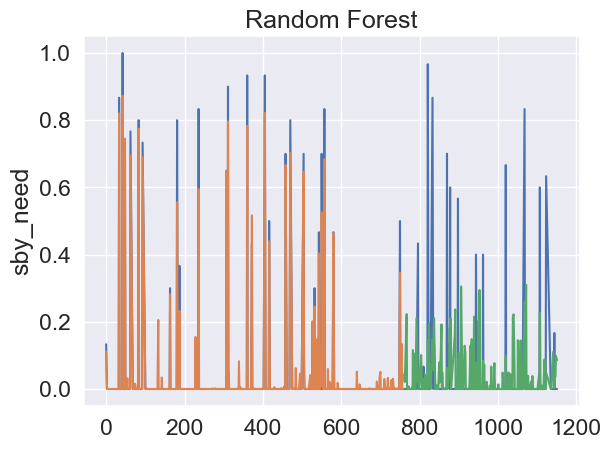

Training MSE: 0.0006986895612627218
Training MAE: 0.0063652755484216875
Training MAPE: 19.733860127366
Test MSE: 0.018130576525704812
Test MAE: 0.053664676616915444
Test MAPE: 76.33672540477761


In [42]:
# Random Forest Model

rf_df_all= final_data[['sby_need']]
rf_df_tr = rf_df_all[:math.floor(len(rf_df_all) * 70/100)]
rf_df_tst= rf_df_all[math.floor(len(rf_df_all)* 70/100):]

# Fitting the model
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x_train, y_train)

# Making predictions
train_predictions_rf = rf_reg.predict(x_train)
test_predictions_rf = rf_reg.predict(x_test)

# Storing the results
rf_df_tr['train_pred']= train_predictions_rf
rf_df_tst['test_pred']= test_predictions_rf

rf_result_df = rf_df_all[['sby_need']]
rf_result_df['train_pred']= rf_df_tr['train_pred']
rf_result_df['test_pred']= rf_df_tst['test_pred']

# Random Forest Results Plot with actual and predicted values
sns.lineplot(data= rf_result_df, x= rf_result_df.index, y='sby_need')
sns.lineplot(data= rf_result_df, x= rf_result_df.index, y='train_pred')
sns.lineplot(data= rf_result_df, x= rf_result_df.index, y='test_pred')
plt.title('Random Forest')
plt.show()

# Evaluation
# MSE Train
train_mse_rf = mean_squared_error(y_train, train_predictions_rf)
# MAE Train
train_mae_rf = mean_absolute_error(y_train, train_predictions_rf)
# MAPE Train
mape_df_fet_tr_rf = rf_df_tr[['sby_need', 'train_pred']]
mape_df_tr_rf = mape_df_fet_tr_rf[mape_df_fet_tr_rf['sby_need'] != 0]
train_mape_rf= (1/mape_df_tr_rf.shape[0]) * abs((mape_df_tr_rf['sby_need'] - mape_df_tr_rf['train_pred'].dropna())/mape_df_tr_rf['sby_need']).sum() * 100

# MSE Test
test_mse_rf = mean_squared_error(y_test, test_predictions_rf)
# MAE Test
test_mae_rf = mean_absolute_error(y_test, test_predictions_rf)
# MAPE Test
mape_df_fet_tst_rf = rf_df_tst[['sby_need', 'test_pred']]
mape_df_tst_rf = mape_df_fet_tst_rf[mape_df_fet_tst_rf['sby_need'] != 0]
test_mape_rf= (1/mape_df_tst_rf.shape[0]) * abs((mape_df_tst_rf['sby_need'] - mape_df_tst_rf['test_pred'].dropna())/mape_df_tst_rf['sby_need']).sum() * 100

print(f'Training MSE: {train_mse_rf}')
print(f'Training MAE: {train_mae_rf}')
print(f'Training MAPE: {train_mape_rf}')
print(f'Test MSE: {test_mse_rf}')
print(f'Test MAE: {test_mae_rf}')
print(f'Test MAPE: {test_mape_rf}')

In [ ]:
# K-nearest neighbors Model

In [43]:
# KNN model calculating RMSE scores for different K values
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    k_chk_model = KNeighborsRegressor(n_neighbors = K)

    k_chk_model.fit(x_train, y_train)  #fit the model
    k_chk_pred=k_chk_model.predict(x_test) #make prediction on test set
    knn_error = math.sqrt(mean_squared_error(y_test,k_chk_pred)) #calculate rmse
    rmse_val.append(knn_error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', knn_error)

RMSE value for k=  1 is: 0.19672905663554072
RMSE value for k=  2 is: 0.16371452624253974
RMSE value for k=  3 is: 0.15644733715100412
RMSE value for k=  4 is: 0.15103979026111866
RMSE value for k=  5 is: 0.14646752649788267
RMSE value for k=  6 is: 0.1406615729011529
RMSE value for k=  7 is: 0.13922837313423578
RMSE value for k=  8 is: 0.13905418749728712
RMSE value for k=  9 is: 0.13752564797562233
RMSE value for k=  10 is: 0.1377563944514808
RMSE value for k=  11 is: 0.1372396356618235
RMSE value for k=  12 is: 0.13731781403991059
RMSE value for k=  13 is: 0.13675786719400687
RMSE value for k=  14 is: 0.1369934201973891
RMSE value for k=  15 is: 0.13718067263614472
RMSE value for k=  16 is: 0.1372760902087227
RMSE value for k=  17 is: 0.1377350083840671
RMSE value for k=  18 is: 0.13794315935940132
RMSE value for k=  19 is: 0.13821720319541
RMSE value for k=  20 is: 0.13849743757769933


<Axes: >

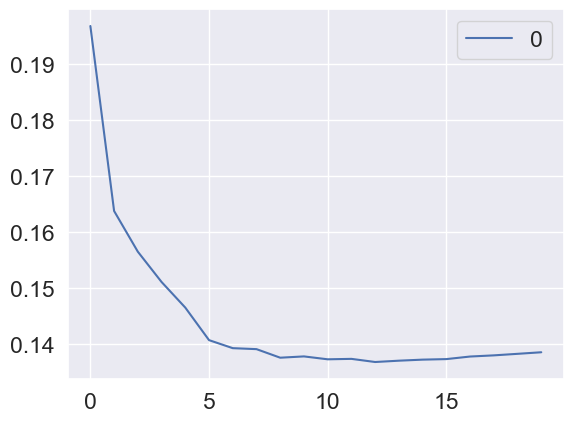

In [44]:
# Plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/1763514814.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_df_tr['train_pred']= train_predictions_knn
/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/1763514814.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_df_tst['test_pred']= test_predictions_knn


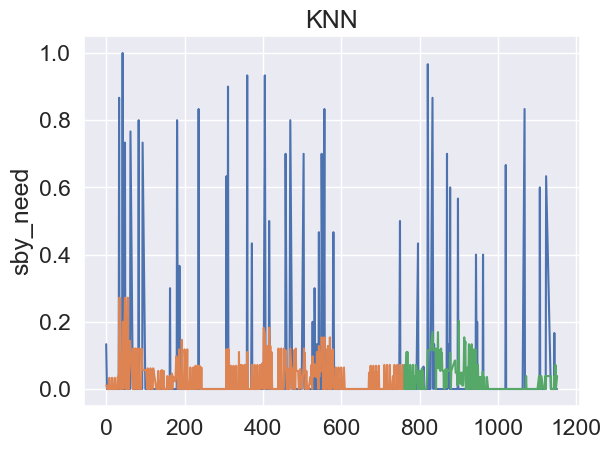

Training MSE: 0.016078960893135482
Training MAE: 0.04330164217804666
Training MAPE: 77.33342880832174
Test MSE: 0.01870271423945362
Test MAE: 0.052210103329506305
Test MAPE: 83.44672371353118


In [45]:
# Implementing KNN Model

knn_df_all= final_data[['sby_need']]
knn_df_tr = rf_df_all[:math.floor(len(knn_df_all) * 70/100)]
knn_df_tst= rf_df_all[math.floor(len(knn_df_all)* 70/100):]

# Fitting the model with k=13
knn_model = KNeighborsRegressor(n_neighbors = 13)
knn_model.fit(x_train, y_train)

# Making predictions
train_predictions_knn= knn_model.predict(x_train)
test_predictions_knn= knn_model.predict(x_test)

# Storing the results
knn_df_tr['train_pred']= train_predictions_knn
knn_df_tst['test_pred']= test_predictions_knn

knn_result_df = knn_df_all[['sby_need']]
knn_result_df['train_pred']= knn_df_tr['train_pred']
knn_result_df['test_pred']= knn_df_tst['test_pred']

# KNN Results Plot with actual and predicted values
sns.lineplot(data= knn_result_df, x= knn_result_df.index, y='sby_need')
sns.lineplot(data= knn_result_df, x= knn_result_df.index, y='train_pred')
sns.lineplot(data= knn_result_df, x= knn_result_df.index, y='test_pred')
plt.title('KNN')
plt.show()

# KNN Evaluation
# MSE Train
train_mse_knn = mean_squared_error(y_train, train_predictions_knn)
# MAE Train
train_mae_knn = mean_absolute_error(y_train, train_predictions_knn)
# MAPE Train
mape_df_fet_tr_knn = knn_df_tr[['sby_need', 'train_pred']]
mape_df_tr_knn = mape_df_fet_tr_knn[mape_df_fet_tr_knn['sby_need'] != 0]
train_mape_knn= (1/mape_df_tr_knn.shape[0]) * abs((mape_df_tr_knn['sby_need'] - mape_df_tr_knn['train_pred'].dropna())/mape_df_tr_knn['sby_need']).sum() * 100

# MSE Test
test_mse_knn = mean_squared_error(y_test, test_predictions_knn)
# MAE Test
test_mae_knn = mean_absolute_error(y_test, test_predictions_knn)
# MAPE Test
mape_df_fet_tst_knn = knn_df_tst[['sby_need', 'test_pred']]
mape_df_tst_knn = mape_df_fet_tst_knn[mape_df_fet_tst_knn['sby_need'] != 0]
test_mape_knn= (1/mape_df_tst_knn.shape[0]) * abs((mape_df_tst_knn['sby_need'] - mape_df_tst_knn['test_pred'].dropna())/mape_df_tst_knn['sby_need']).sum() * 100

print(f'Training MSE: {train_mse_knn}')
print(f'Training MAE: {train_mae_knn}')
print(f'Training MAPE: {train_mape_knn}')
print(f'Test MSE: {test_mse_knn}')
print(f'Test MAE: {test_mae_knn}')
print(f'Test MAPE: {test_mape_knn}')

In [ ]:
# XGBoost Model

/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/2839136182.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_df_tr['train_pred']= train_predictions_xgb
/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/2839136182.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_df_tst['test_pred']= test_predictions_xgb


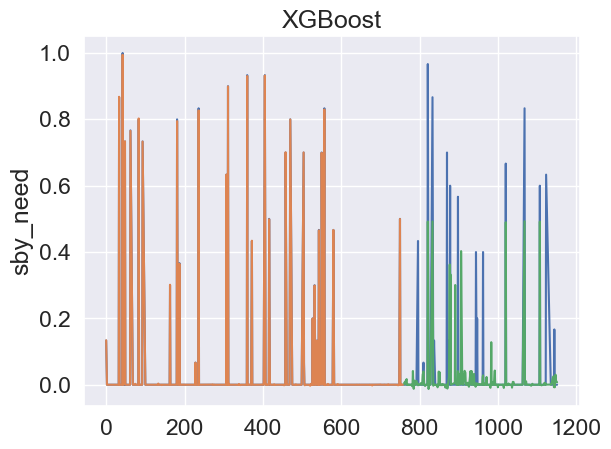

Training MSE: 4.42811742373576e-07
Training MAE: 0.0001980515118734058
Training MAPE: 0.30732912841480814
Test MSE: 0.011700288911844554
Test MAE: 0.03115586166271978
Test MAPE: 74.8138299250193


In [46]:
# Implementing XGBoost Model

xgb_df_all= final_data[['sby_need']]
xgb_df_tr = xgb_df_all[:math.floor(len(xgb_df_all) * 70/100)]
xgb_df_tst= xgb_df_all[math.floor(len(xgb_df_all)* 70/100):]

# Fitting the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(x_train, y_train)

# Making predictions
train_predictions_xgb = xgb_model.predict(x_train)
test_predictions_xgb = xgb_model.predict(x_test)

# Storing the results
xgb_df_tr['train_pred']= train_predictions_xgb
xgb_df_tst['test_pred']= test_predictions_xgb

xgb_result_df = xgb_df_all[['sby_need']]
xgb_result_df['train_pred']= xgb_df_tr['train_pred']
xgb_result_df['test_pred']= xgb_df_tst['test_pred']

# XGBoost Results Plot with actual and predicted values
sns.lineplot(data= xgb_result_df, x= xgb_result_df.index, y='sby_need')
sns.lineplot(data= xgb_result_df, x= xgb_result_df.index, y='train_pred')
sns.lineplot(data= xgb_result_df, x= xgb_result_df.index, y='test_pred')
plt.title('XGBoost')
plt.show()

# XGB Evaluation
# MSE Train
train_mse_xgb = mean_squared_error(y_train, train_predictions_xgb)
# MAE Train
train_mae_xgb = mean_absolute_error(y_train, train_predictions_xgb)
# MAPE Train
mape_df_fet_tr_xgb = xgb_df_tr[['sby_need', 'train_pred']]
mape_df_tr_xgb = mape_df_fet_tr_xgb[mape_df_fet_tr_xgb['sby_need'] != 0]
train_mape_xgb= (1/mape_df_tr_xgb.shape[0]) * abs((mape_df_tr_xgb['sby_need'] - mape_df_tr_xgb['train_pred'].dropna())/mape_df_tr_xgb['sby_need']).sum() * 100

# MSE Test
test_mse_xgb = mean_squared_error(y_test, test_predictions_xgb)
# MAE Test
test_mae_xgb = mean_absolute_error(y_test, test_predictions_xgb)
# MAPE Test
mape_df_fet_tst_xgb = xgb_df_tst[['sby_need', 'test_pred']]
mape_df_tst_xgb = mape_df_fet_tst_xgb[mape_df_fet_tst_xgb['sby_need'] != 0]
test_mape_xgb= (1/mape_df_tst_xgb.shape[0]) * abs((mape_df_tst_xgb['sby_need'] - mape_df_tst_xgb['test_pred'].dropna())/mape_df_tst_xgb['sby_need']).sum() * 100

print(f'Training MSE: {train_mse_xgb}')
print(f'Training MAE: {train_mae_xgb}')
print(f'Training MAPE: {train_mape_xgb}')
print(f'Test MSE: {test_mse_xgb}')
print(f'Test MAE: {test_mae_xgb}')
print(f'Test MAPE: {test_mape_xgb}')

In [ ]:
# Polynomial Regression Model

In [47]:
# Implementing Polynomial regression model

poly_df_all= final_data[['sby_need']]
poly_df_tr = poly_df_all[:math.floor(len(poly_df_all) * 70/100)]
poly_df_tst= poly_df_all[math.floor(len(poly_df_all)* 70/100):]

# Choose the degree of the polynomial
poly_degree = 2  # You can adjust this based on your needs

# Create a polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())

# Fit the model on the training data
poly_model.fit(x_train, y_train)

# Predictions on the training set
train_predictions_poly = poly_model.predict(x_train)

# Predictions on the test set
test_predictions_poly = poly_model.predict(x_test)

# Storing the results
poly_df_tr['train_pred']= train_predictions_poly
poly_df_tst['test_pred']= test_predictions_poly

# Polynomial result dataframe
poly_result_df = poly_df_all[['sby_need']]
poly_result_df['train_pred'] = poly_df_tr['train_pred']
poly_result_df['test_pred'] = poly_df_tst['test_pred']

/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/2055091283.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_df_tr['train_pred']= train_predictions_poly
/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/2055091283.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_df_tst['test_pred']= test_predictions_poly


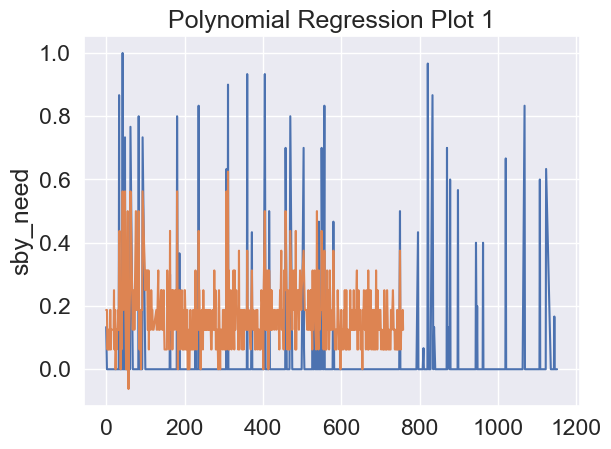

In [48]:
# Polynomial Train Plot with actual and training predictions 
sns.lineplot(data= poly_result_df, x= poly_result_df.index, y='sby_need')
sns.lineplot(data= poly_result_df, x= poly_result_df.index, y='train_pred')
plt.title('Polynomial Regression Plot 1')
plt.show()

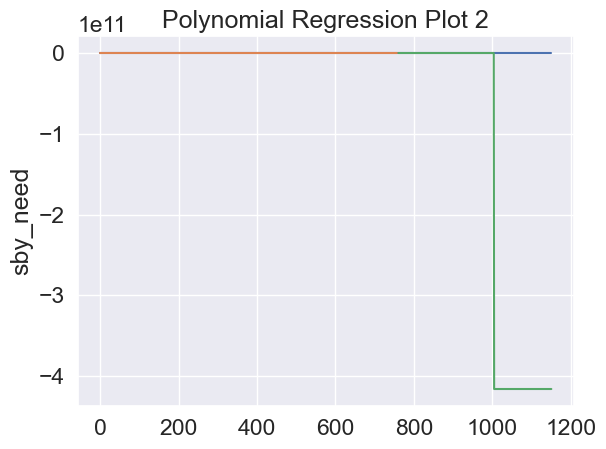

In [49]:
# Polynomial regression plot with actual and predicted values
sns.lineplot(data= poly_result_df, x= poly_result_df.index, y='sby_need')
sns.lineplot(data= poly_result_df, x= poly_result_df.index, y='train_pred')
sns.lineplot(data= poly_result_df, x= poly_result_df.index, y='test_pred')
plt.title('Polynomial Regression Plot 2')
plt.show()

In [50]:
# Evaluate polynomial model

# MSE Train
train_mse_poly = mean_squared_error(y_train, train_predictions_poly)
# MAE Train
train_mae_poly = mean_absolute_error(y_train, train_predictions_poly)
# MAPE Train
mape_df_fet_tr_poly = poly_df_tr[['sby_need', 'train_pred']]
mape_df_tr_poly = mape_df_fet_tr_poly[mape_df_fet_tr_poly['sby_need'] != 0]
train_mape_poly= (1/mape_df_tr_poly.shape[0]) * abs((mape_df_tr_poly['sby_need'] - mape_df_tr_poly['train_pred'].dropna())/mape_df_tr_poly['sby_need']).sum() * 100

# MSE Test
test_mse_poly = mean_squared_error(y_test, test_predictions_poly)
# MAE Test
test_mae_poly = mean_absolute_error(y_test, test_predictions_poly)
# MAPE Test
mape_df_fet_tst_poly = poly_df_tst[['sby_need', 'test_pred']]
mape_df_tst_poly = mape_df_fet_tst_poly[mape_df_fet_tst_poly['sby_need'] != 0]
test_mape_poly= (1/mape_df_tst_poly.shape[0]) * abs((mape_df_tst_poly['sby_need'] - mape_df_tst_poly['test_pred'].dropna())/mape_df_tst_poly['sby_need']).sum() * 100

print(f'Training MSE: {train_mse_poly}')
print(f'Training MAE: {train_mae_poly}')
print(f'Training MAPE: {train_mape_poly}')
print(f'Test MSE: {test_mse_poly}')
print(f'Test MAE: {test_mae_poly}')
print(f'Test MAPE: {test_mape_poly}')

Training MSE: 0.030545467718922775
Training MAE: 0.15321027287319422
Training MAPE: 66.11494159391758
Test MSE: 5.812864191486263e+22
Test MAE: 139716901566.65945
Test MAPE: 29234850289048.402


In [ ]:
# XGBoost Model with Hyperparameter Tuning 70-30 Split

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Score:  0.15007814609521014


/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/3325544594.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_tuned_df_tr['train_pred']= train_pred_tuned_xgb
/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/3325544594.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_tuned_df_tst['test_pred']= test_pred_tuned_xgb


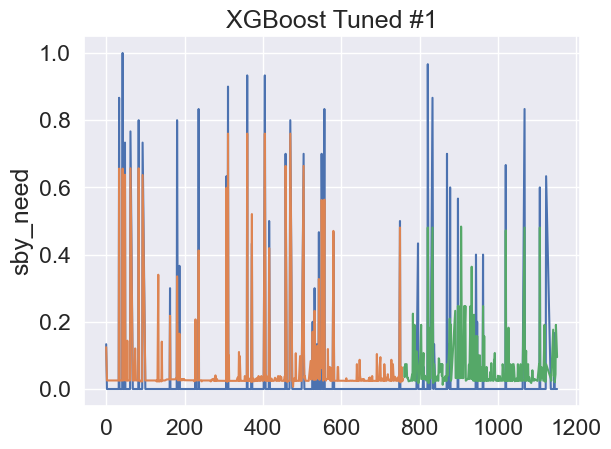

Training MSE: 0.0026923628944312676
Training MAE: 0.03469383955413427
Training MAPE: 27.473002388777328
Test MSE: 0.01289030558550657
Test MAE: 0.06668667191157665
Test MAPE: 52.26508697046538


In [51]:
# XG Boost Hyperparameter Tuned Model

xgb_tuned_df_all= final_data[['sby_need']]
xgb_tuned_df_tr = xgb_tuned_df_all[:math.floor(len(xgb_tuned_df_all) * 70/100)]
xgb_tuned_df_tst= xgb_tuned_df_all[math.floor(len(xgb_tuned_df_all)* 70/100):]
   
# Initialize XGBoost regressor
xgb_model_tuned = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV to find the best hyperparameters
grid_search_xgb = GridSearchCV(estimator=xgb_model_tuned, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
grid_result_xgb = grid_search_xgb.fit(x_train, y_train)

# Print best parameters and best score
print("Best Parameters: ", grid_result_xgb.best_params_)
print("Best Score: ", np.sqrt(-grid_result_xgb.best_score_))

# Get the best model
best_xgb = grid_result_xgb.best_estimator_

# Make predictions using the best model
train_pred_tuned_xgb= best_xgb.predict(x_train)
test_pred_tuned_xgb= best_xgb.predict(x_test)

# Storing the results
xgb_tuned_df_tr['train_pred']= train_pred_tuned_xgb
xgb_tuned_df_tst['test_pred']= test_pred_tuned_xgb

xgb_tuned_result_df = xgb_tuned_df_all[['sby_need']]
xgb_tuned_result_df['train_pred']= xgb_tuned_df_tr['train_pred']
xgb_tuned_result_df['test_pred']= xgb_tuned_df_tst['test_pred']

# XGBoost Tuned Results Plot with actual and predicted values
sns.lineplot(data= xgb_tuned_result_df, x= xgb_tuned_result_df.index, y='sby_need')
sns.lineplot(data= xgb_tuned_result_df, x= xgb_tuned_result_df.index, y='train_pred')
sns.lineplot(data= xgb_tuned_result_df, x= xgb_tuned_result_df.index, y='test_pred')
plt.title('XGBoost Tuned #1')
plt.show()

# Evaluate XGBoost Tuned model 70-30 Split
# MSE Train
train_mse_xgb_tuned = mean_squared_error(y_train, train_pred_tuned_xgb)
# MAE Train
train_mae_xgb_tuned = mean_absolute_error(y_train, train_pred_tuned_xgb)
# MAPE Train
mape_df_fet_tr_xgb_tuned = xgb_tuned_df_tr[['sby_need', 'train_pred']]
mape_df_tr_xgb_tuned = mape_df_fet_tr_xgb_tuned[mape_df_fet_tr_xgb_tuned['sby_need'] != 0]
train_mape_xgb_tuned= (1/mape_df_tr_xgb_tuned.shape[0]) * abs((mape_df_tr_xgb_tuned['sby_need'] - mape_df_tr_xgb_tuned['train_pred'].dropna())/mape_df_tr_xgb_tuned['sby_need']).sum() * 100

# MSE Test
test_mse_xgb_tuned = mean_squared_error(y_test, test_pred_tuned_xgb)
# MAE Test
test_mae_xgb_tuned = mean_absolute_error(y_test, test_pred_tuned_xgb)
# MAPE Test
mape_df_fet_tst_xgb_tuned = xgb_tuned_df_tst[['sby_need', 'test_pred']]
mape_df_tst_xgb_tuned = mape_df_fet_tst_xgb_tuned[mape_df_fet_tst_xgb_tuned['sby_need'] != 0]
test_mape_xgb_tuned= (1/mape_df_tst_xgb_tuned.shape[0]) * abs((mape_df_tst_xgb_tuned['sby_need'] - mape_df_tst_xgb_tuned['test_pred'].dropna())/mape_df_tst_xgb_tuned['sby_need']).sum() * 100

print(f'Training MSE: {train_mse_xgb_tuned}')
print(f'Training MAE: {train_mae_xgb_tuned}')
print(f'Training MAPE: {train_mape_xgb_tuned}')
print(f'Test MSE: {test_mse_xgb_tuned}')
print(f'Test MAE: {test_mae_xgb_tuned}')
print(f'Test MAPE: {test_mape_xgb_tuned}')

In [ ]:
# XGBoost Model with Hyperparameter Tuning 80-20 Split

In [52]:
# 80/20 Train-test split 
x_2 = final_data.drop(columns=['sby_need', 'date']).copy()  
y_2 = final_data['sby_need'].copy()  

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2,shuffle=False, random_state=42)

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best Score:  0.20178749440902036


/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/1388404865.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_tuned_df_tr_2['train_pred']= train_pred_tuned_xgb_2
/var/folders/w8/vv9t38xn7vd4xx4jj7790cq00000gn/T/ipykernel_66325/1388404865.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_tuned_df_tst_2['test_pred']= test_pred_tuned_xgb_2


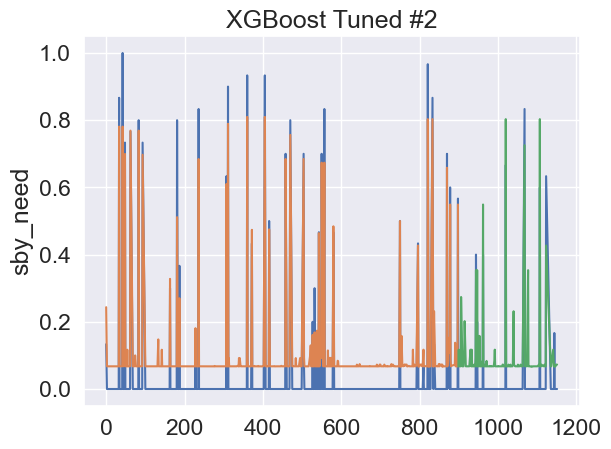

Training MSE: 0.005092192110282027
Training MAE: 0.06926621434240418
Training MAPE: 21.13008059094389
Test MSE: 0.0077101706478718435
Test MAE: 0.0795746392100439
Test MAPE: 35.24681396978466


In [53]:
# XG Boost Hyperparameter Tuned Model

xgb_tuned_df_all_2= final_data[['sby_need']]
xgb_tuned_df_tr_2 = xgb_tuned_df_all_2[:math.floor(len(xgb_tuned_df_all_2) * 80/100)]
xgb_tuned_df_tst_2= xgb_tuned_df_all_2[math.floor(len(xgb_tuned_df_all_2)* 80/100):]
   
# Initialize XGBoost regressor
xgb_model_tuned_2 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_2 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV to find the best hyperparameters
grid_search_xgb_2 = GridSearchCV(estimator=xgb_model_tuned_2, param_grid=param_grid_2, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
grid_result_xgb_2 = grid_search_xgb_2.fit(x_train_2, y_train_2)

# Print best parameters and best score
print("Best Parameters: ", grid_result_xgb_2.best_params_)
print("Best Score: ", np.sqrt(-grid_result_xgb_2.best_score_))

# Get the best model
best_xgb_2 = grid_result_xgb_2.best_estimator_

# Make predictions using the best model
train_pred_tuned_xgb_2= best_xgb_2.predict(x_train_2)
test_pred_tuned_xgb_2= best_xgb_2.predict(x_test_2)

# Storing the results
xgb_tuned_df_tr_2['train_pred']= train_pred_tuned_xgb_2
xgb_tuned_df_tst_2['test_pred']= test_pred_tuned_xgb_2

xgb_tuned_result_df_2 = xgb_tuned_df_all_2[['sby_need']]
xgb_tuned_result_df_2['train_pred']= xgb_tuned_df_tr_2['train_pred']
xgb_tuned_result_df_2['test_pred']= xgb_tuned_df_tst_2['test_pred']

# XGBoost Tuned Results Plot with actual and predicted values
sns.lineplot(data= xgb_tuned_result_df_2, x= xgb_tuned_result_df_2.index, y='sby_need')
sns.lineplot(data= xgb_tuned_result_df_2, x= xgb_tuned_result_df_2.index, y='train_pred')
sns.lineplot(data= xgb_tuned_result_df_2, x= xgb_tuned_result_df_2.index, y='test_pred')
plt.title('XGBoost Tuned #2')
plt.show()

# Evaluate XGBoost Tuned model 80-20 Split
# MSE Train
train_mse_xgb_tuned_2 = mean_squared_error(y_train_2, train_pred_tuned_xgb_2)
# MAE Train
train_mae_xgb_tuned_2 = mean_absolute_error(y_train_2, train_pred_tuned_xgb_2)
# MAPE Train
mape_df_fet_tr_xgb_tuned_2 = xgb_tuned_df_tr_2[['sby_need', 'train_pred']]
mape_df_tr_xgb_tuned_2 = mape_df_fet_tr_xgb_tuned_2[mape_df_fet_tr_xgb_tuned_2['sby_need'] != 0]
train_mape_xgb_tuned_2= (1/mape_df_tr_xgb_tuned_2.shape[0]) * abs((mape_df_tr_xgb_tuned_2['sby_need'] - mape_df_tr_xgb_tuned_2['train_pred'].dropna())/mape_df_tr_xgb_tuned_2['sby_need']).sum() * 100

# MSE Test
test_mse_xgb_tuned_2 = mean_squared_error(y_test_2, test_pred_tuned_xgb_2)
# MAE Test
test_mae_xgb_tuned_2 = mean_absolute_error(y_test_2, test_pred_tuned_xgb_2)
# MAPE Test
mape_df_fet_tst_xgb_tuned_2 = xgb_tuned_df_tst_2[['sby_need', 'test_pred']]
mape_df_tst_xgb_tuned_2 = mape_df_fet_tst_xgb_tuned_2[mape_df_fet_tst_xgb_tuned_2['sby_need'] != 0]
test_mape_xgb_tuned_2= (1/mape_df_tst_xgb_tuned_2.shape[0]) * abs((mape_df_tst_xgb_tuned_2['sby_need'] - mape_df_tst_xgb_tuned_2['test_pred'].dropna())/mape_df_tst_xgb_tuned_2['sby_need']).sum() * 100

print(f'Training MSE: {train_mse_xgb_tuned_2}')
print(f'Training MAE: {train_mae_xgb_tuned_2}')
print(f'Training MAPE: {train_mape_xgb_tuned_2}')
print(f'Test MSE: {test_mse_xgb_tuned_2}')
print(f'Test MAE: {test_mae_xgb_tuned_2}')
print(f'Test MAPE: {test_mape_xgb_tuned_2}')